# Analyzing The Rich

> Author: Saad Elbeleidy

> Data: [Forbes Billionaires List](http://www.forbes.com/billionaires/list)

This post explores some questions about the richest people alive. The data was collected from the [Forbes Billionaires List](http://www.forbes.com/billionaires/list). You can go to that site, scroll down, select all and copy into a tsv file. After some minor formatting edits you can see a file similar to the one called `raw.tsv` in the repo/folder.

The analysis aims to explore a few questions that I have about the dataset.

* How many billionaires are there? How does that amount compare to the rest of the world?
* How much money does the average/median billionaire have? How much do they all have combined? How does that compare to countries' GDPs, fortune 500 companies? How do they compare to each other?
* Which country has the most billionaires and how do they compare?
* Which country has the most money if we add all their billionaires together and how do they compare?
* How does age correlate to how rich you are given that you are a billionaire? What is the distribution of billionaire's ages?
* How does industry correlate to how rich you are given that you are a billionaire, and which industries have the most billionaires?
* How does gender correlate? Which countries have the most female billionaires and which have the highest percentage of female billionaries?

In [1]:
## Getting the data and setting things up
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

fig_size =[0,0]
fig_size[0] = 12
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

billionaires = pd.read_csv('raw.tsv', sep='\t', header=0)
womenBillionaires = pd.read_csv('raw_women.tsv', sep='\t', header=0)

womenNames = list(womenBillionaires["Name"])

def isWoman(name):
    if name in womenNames:
        return 1
    else:
        return 0

billionaires['Net Worth'] = pd.to_numeric(billionaires['Net Worth'].map(lambda x: x[1:len(x)-1]))
billionaires['Age'] = pd.to_numeric(billionaires['Age'],errors='coerce')
billionaires["Female"] = billionaires.apply(lambda row: isWoman(row["Name"]), axis=1)

billionaires.head(20)

,Rank,Name,Net Worth,Age,Source,Country of Citizenship,Female
0,1,Bill Gates,75.0,61.0,Microsoft,United States,0
1,2,Amancio Ortega,67.0,80.0,Zara,Spain,0
2,3,Warren Buffett,60.8,86.0,Berkshire Hathaway,United States,0
3,4,Carlos Slim Helu,50.0,76.0,telecom,Mexico,0
4,5,Jeff Bezos,45.2,52.0,Amazon.com,United States,0
5,6,Mark Zuckerberg,44.6,32.0,Facebook,United States,0
6,7,Larry Ellison,43.6,72.0,Oracle,United States,0
7,8,Michael Bloomberg,40.0,74.0,Bloomberg LP,United States,0
8,9,Charles Koch,39.6,81.0,diversified,United States,0
9,9,David Koch,39.6,76.0,diversified,United States,0


In [2]:
billionaires.tail()

,Rank,Name,Net Worth,Age,Source,Country of Citizenship,Female
1805,1694,Zeng Kaitian,1.0,42.0,online games,China,0
1806,1694,Zhang Keqiang,1.0,56.0,real estate,China,0
1807,1694,Zhang Wanzhen,1.0,67.0,advanced ceramics,China,0
1808,1694,Zhou Yaoting,1.0,73.0,"apparel, real estate",China,0
1809,1694,Zhuang Min,1.0,48.0,surveillance equipment,China,0


In [3]:
womenBillionaires.head()

,Rank,Name,Net Worth,Age,Source,Country of Citizenship
0,11,Liliane Bettencourt,$36.1 B,94,L'Oreal,France
1,16,Alice Walton,$32.3 B,67,Wal-Mart,United States
2,27,Jacqueline Mars,$23.4 B,77,candy,United States
3,30,Maria Franca Fissolo,$22.1 B,99,"Nutella, Chocolates",Italy
4,38,Susanne Klatten,$18.5 B,54,"BMW, pharmaceuticals",Germany


## Billionaire Count

>How many billionaires are there? How does that amount compare to the rest of the world?

Some interesting values to compare this number to:

* Number of people in the world - [7,432,663,275](http://www.worldometers.info/world-population/)
* Number of people in poverty - [767,000,000](http://www.worldbank.org/en/publication/poverty-and-shared-prosperity) (2013)
* Number of people in Africa - [1,216,129,815](http://www.worldometers.info/world-population/africa-population/) (2016)
* Number of people in the most populated country - [1,382,323,332](http://www.worldometers.info/world-population/china-population/) (China 2016)
* Number of people in America - [324,118,787](http://www.worldometers.info/world-population/us-population/)
* Number of people in the most populated city - [38,000,000](http://www.newgeography.com/content/005219-largest-cities-world-2016) (Tokyo 2016 estimate)
* Number of people in Washington D.C. - [6,097,684](https://en.wikipedia.org/wiki/List_of_Metropolitan_Statistical_Areas#United_States) (2015 estimate)
* "The 1%"
* America's "1%"
* "The 0.1%"
* America's "0.1%"


An interesting value as well is to find out what that number is as a percentage of the world.

In [4]:
billionaireCount = len(billionaires)
print("There are {} billionaires".format(billionaireCount))

There are 1810 billionaires


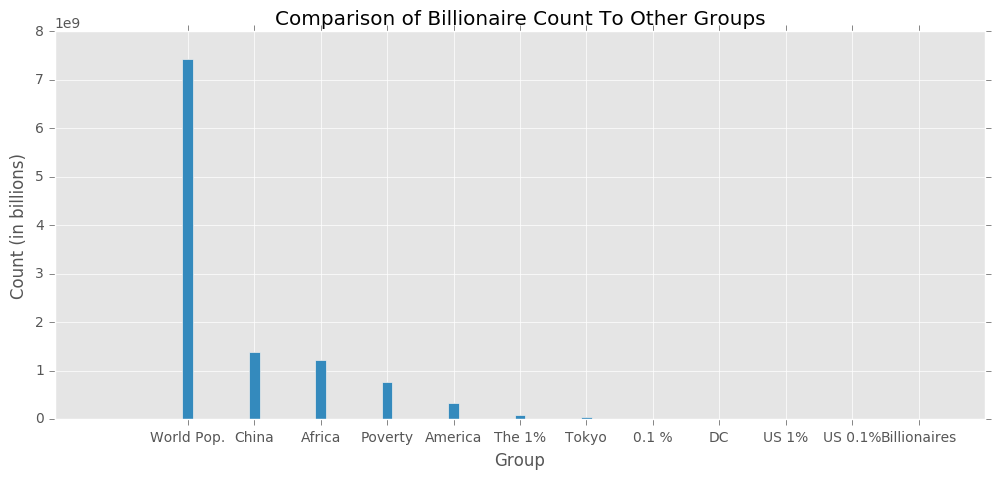

In [5]:
import math
# Assigning the values from the links
world = 7432663275
poverty = 767000000
africa = 1216129815
china = 1382323332
america = 324118787
tokyo = 38000000
dc = 6097684
onePercent = math.floor(0.01 * world)
americanOnePercent = math.floor(0.01* america)
pointOnePercent = math.floor(0.1* onePercent)
americanPointOnePercent = math.floor(0.1 * americanOnePercent)
billionaires_count = len(billionaires)

values = {
    "Billionaires": len(billionaires),
    "World Pop.": world,
    "Poverty": poverty,
    "Africa": africa,
    "China": china,
    "America": america,
    "Tokyo": tokyo,
    "DC": dc,
    "The 1%": onePercent,
    "US 1%": americanOnePercent,
    "0.1 %": pointOnePercent,
    "US 0.1%": americanPointOnePercent
}

import operator
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(0,len(values)*5, 5), sorted_values[:,1].astype(int), align='center')
plt.xticks(range(0,len(values)*5, 5), sorted_values[:,0])
plt.title("Comparison of Billionaire Count To Other Groups")
plt.xlabel("Group")
plt.ylabel("Count (in billions)")

plt.show()

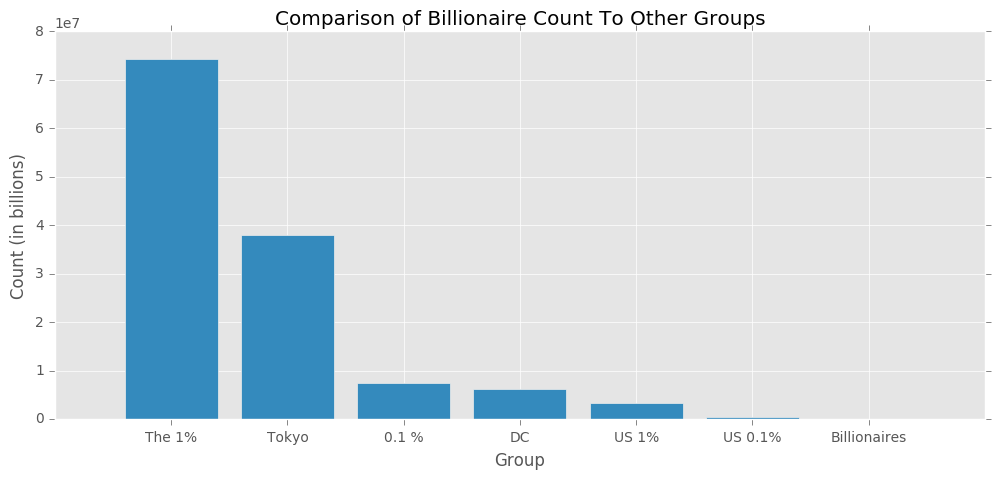

In [6]:
low_sorted_values = sorted_values[5:,:]

plt.bar(range(len(low_sorted_values)), low_sorted_values[:,1].astype(int), align='center')
plt.xticks(range(len(low_sorted_values)), low_sorted_values[:,0])
plt.title("Comparison of Billionaire Count To Other Groups")
plt.xlabel("Group")
plt.ylabel("Count (in billions)")

plt.show()

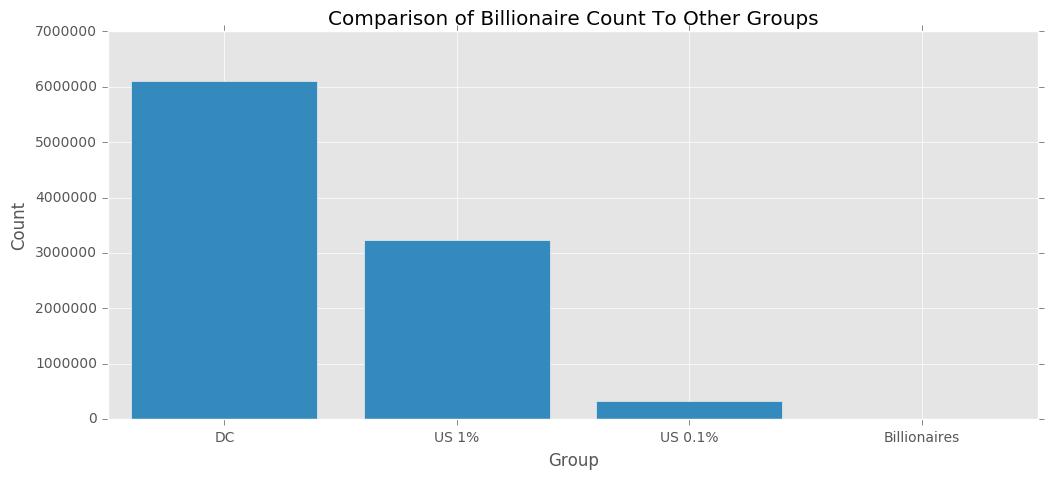

In [7]:
low_sorted_values = sorted_values[8:,:]

plt.bar(range(len(low_sorted_values)), low_sorted_values[:,1].astype(int), align='center')
plt.xticks(range(len(low_sorted_values)), low_sorted_values[:,0])
plt.title("Comparison of Billionaire Count To Other Groups")
plt.xlabel("Group")
plt.ylabel("Count")

plt.show()

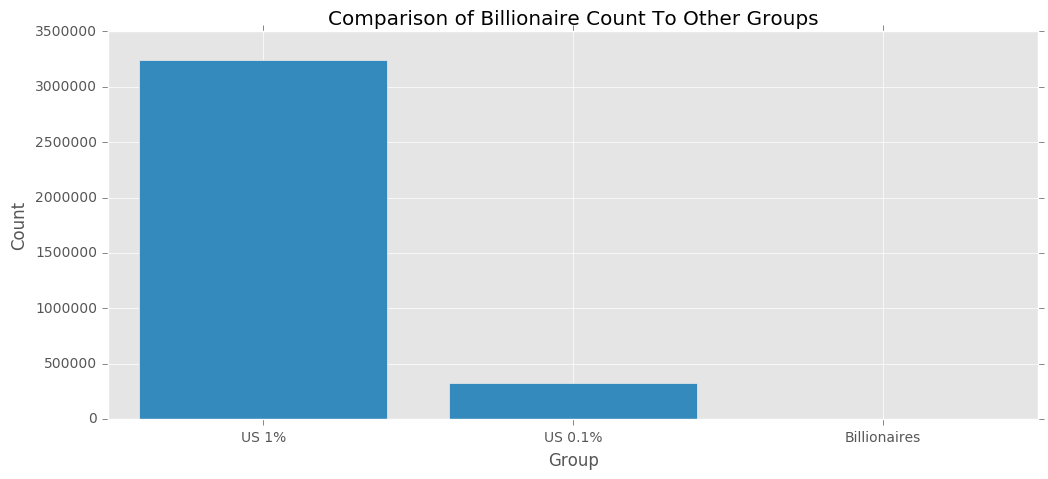

In [8]:
low_sorted_values = sorted_values[9:,:]

plt.bar(range(len(low_sorted_values)), low_sorted_values[:,1].astype(int), align='center')
plt.xticks(range(len(low_sorted_values)), low_sorted_values[:,0])
plt.title("Comparison of Billionaire Count To Other Groups")
plt.xlabel("Group")
plt.ylabel("Count")

plt.show()

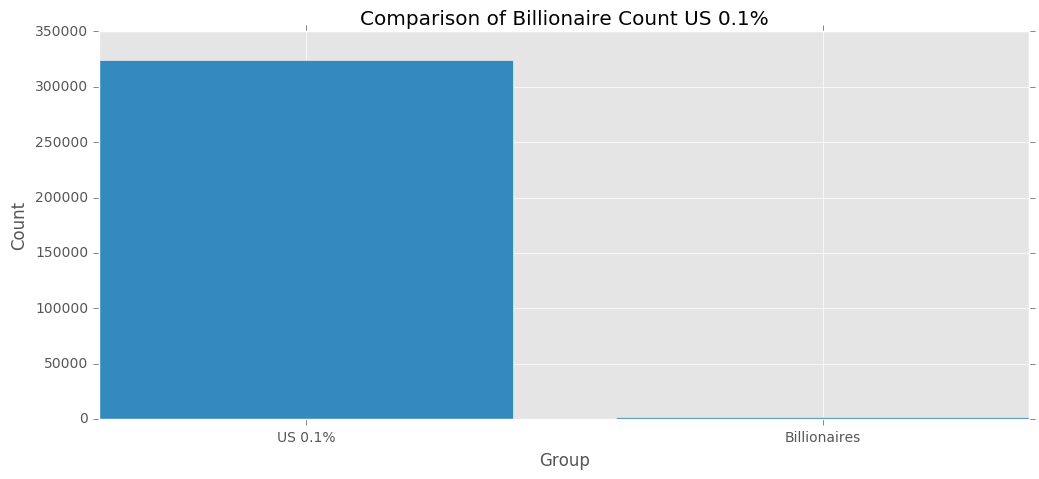

In [9]:
low_sorted_values = sorted_values[10:,:]

plt.bar(range(len(low_sorted_values)), low_sorted_values[:,1].astype(int), align='center')
plt.xticks(range(len(low_sorted_values)), low_sorted_values[:,0])
plt.title("Comparison of Billionaire Count US 0.1%")
plt.xlabel("Group")
plt.ylabel("Count")

plt.show()

In [10]:
print("Billionaires are {:%} of the world population.".format(billionaires_count/world))

Billionaires are 0.000024% of the world population.


## Billionaire Money Amount

>How much money does the average/median billionaire have? How much do they all have combined? How does that compare to countries' GDPs, fortune 500 companies? How do they compare to each other?



Some interesting values to compare to:

* US GDP - [\$18,560 billion](https://en.wikipedia.org/wiki/Economy_of_the_United_States)
* China GDP - [\$11,400 billion](https://en.wikipedia.org/wiki/Economy_of_China)
* Apple Market Cap - [\$617.59 billion](https://ycharts.com/companies/AAPL/market_cap) (End 2016)
* Google Market Cap - [\$531.97 billion](https://ycharts.com/companies/GOOG/market_cap) (End 2016)
* Walmart Market Cap - [\$212.42 billion](https://ycharts.com/companies/WMT/market_cap) (End 2016)

In [11]:
billionaireMean = billionaires['Net Worth'].mean()
billionaireMedian = billionaires['Net Worth'].median()
billionaireSum = sum(billionaires['Net Worth'])

print("The average billionaire is worth ${} billion.".format(round(billionaireMean,2)))
print("The median billionaire is worth ${} billion.".format(round(billionaireMedian,2)))
print("Billionaires have a total of ${} billion".format(round(billionaireSum),2))

The average billionaire is worth $3.58 billion.
The median billionaire is worth $2.05 billion.
Billionaires have a total of $6483.0 billion


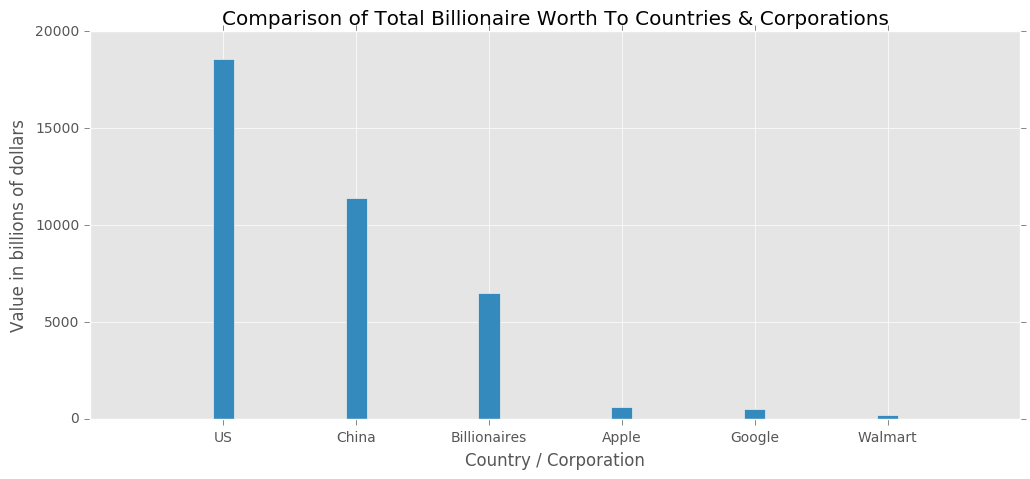

In [12]:
usGDP = 18560
chinaGDP = 11400
apple = 617.59
google = 531.97
walmart = 212.42

values = {
    "Billionaires": billionaireSum,
    "US": usGDP,
    "China": chinaGDP,
    "Apple": apple,
    "Google": google,
    "Walmart": walmart
}

sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(0,len(values)*5, 5), sorted_values[:,1].astype(float), align='center')
plt.xticks(range(0,len(values)*5, 5), sorted_values[:,0])
plt.title("Comparison of Total Billionaire Worth To Countries & Corporations")
plt.xlabel("Country / Corporation")
plt.ylabel("Value in billions of dollars")

plt.show()

## Billionaires Per Country

>Which country has the most billionaires and how do they compare?

In [13]:
totalWorth = billionaires.groupby('Country of Citizenship')['Net Worth'].sum()
averageWorth = billionaires.groupby('Country of Citizenship')['Net Worth'].mean()
medianWorth = billionaires.groupby('Country of Citizenship')['Net Worth'].median()
count = billionaires.groupby('Country of Citizenship')['Net Worth'].count()

byCountry = pd.DataFrame({
    "Total": totalWorth,
    "Average": averageWorth,
    "Median": medianWorth,
    "Count": count
})

byCountry.head()

,Average,Count,Median,Total
Country of Citizenship,,,,
Algeria,3.100000,1,3.10,3.1
Angola,3.000000,1,3.00,3.0
Argentina,2.300000,4,1.85,9.2
Australia,2.468000,25,1.80,61.7
Austria,4.833333,6,2.50,29.0


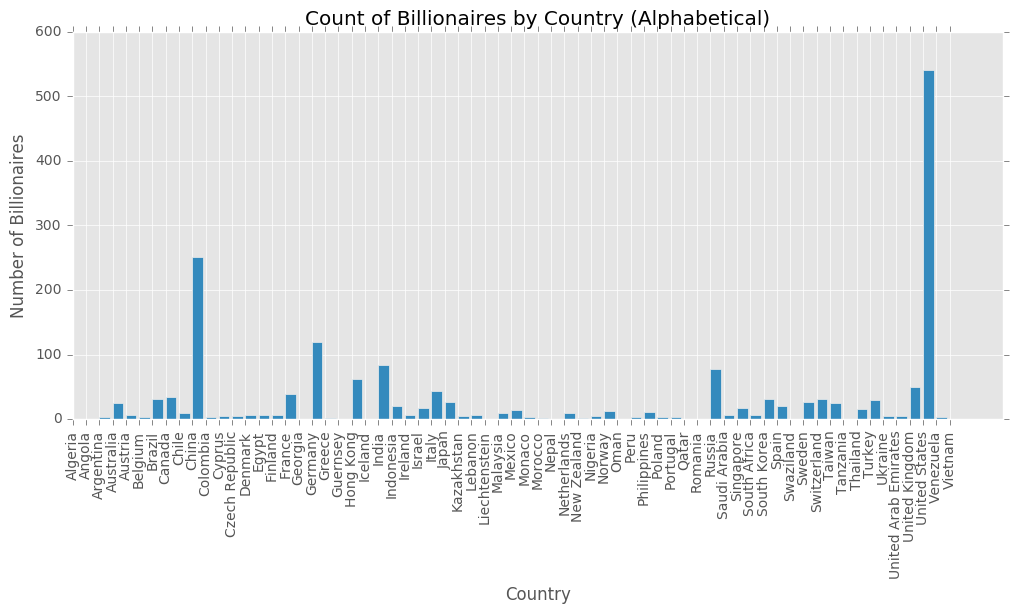

In [14]:
values = byCountry["Count"]

plt.bar(range(len(values)), values)
plt.xticks(range(len(values)), values.keys(), rotation=90)

plt.title("Count of Billionaires by Country (Alphabetical)")
plt.xlabel("Country")
plt.ylabel("Number of Billionaires")

plt.show()

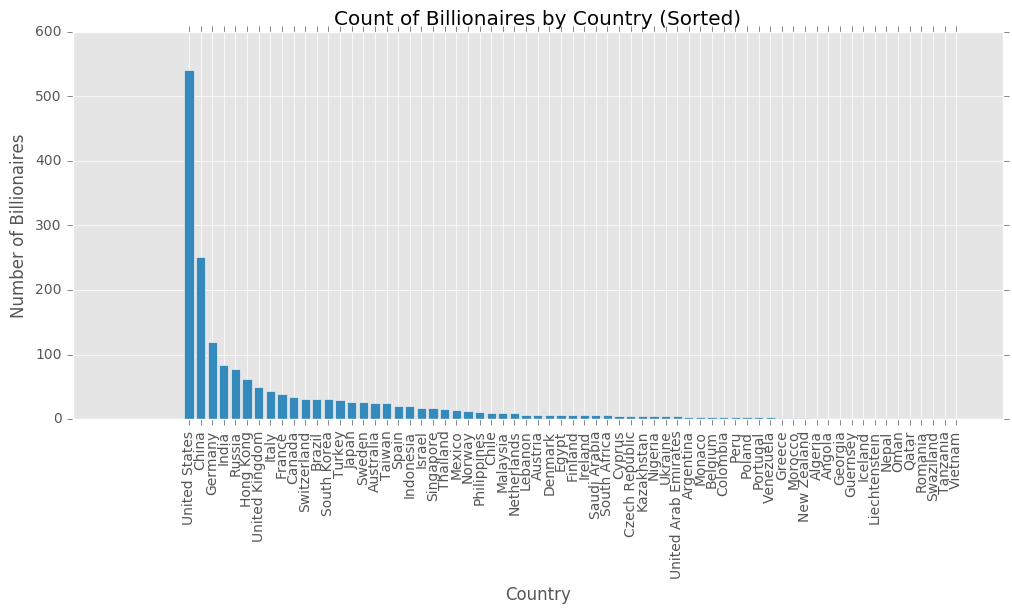

In [15]:
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(len(sorted_values)), sorted_values[:,1].astype(int), align='center')
plt.xticks(range(len(sorted_values)), sorted_values[:,0], rotation=90)

plt.title("Count of Billionaires by Country (Sorted)")
plt.xlabel("Country")
plt.ylabel("Number of Billionaires")

plt.show()

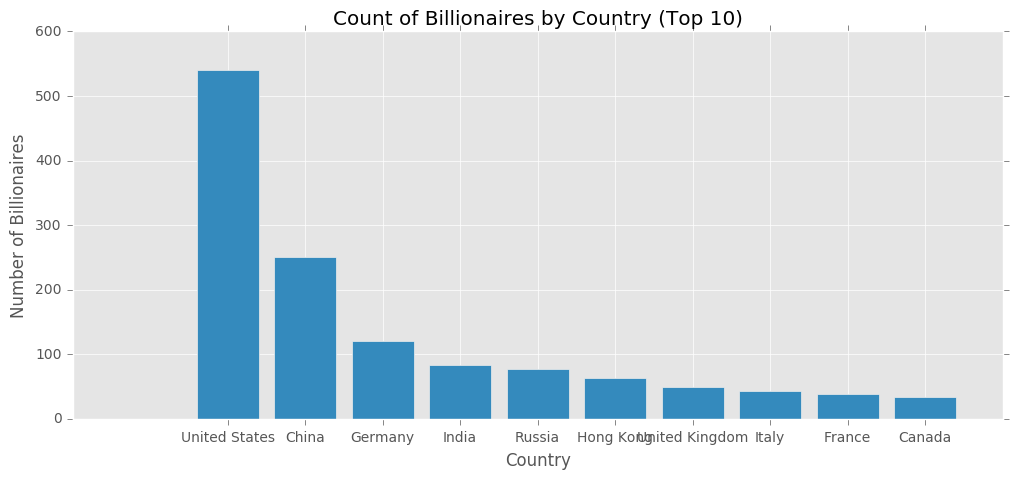

In [16]:
top_sorted_values = sorted_values[0:10,:]

plt.bar(range(len(top_sorted_values)), top_sorted_values[:,1].astype(int), align='center')
plt.xticks(range(len(top_sorted_values)), top_sorted_values[:,0])

plt.title("Count of Billionaires by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Number of Billionaires")

plt.show()

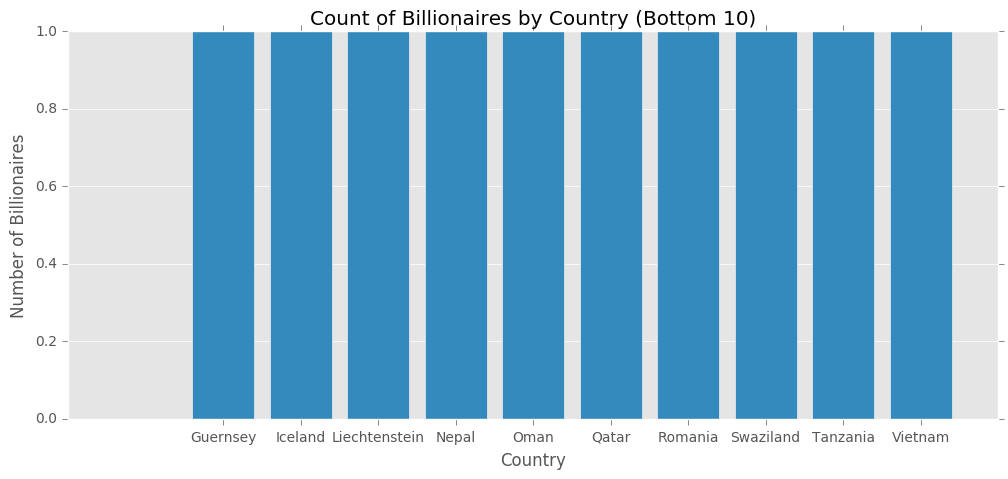

In [17]:
bottom_sorted_values = sorted_values[-10:,:]

plt.bar(range(len(bottom_sorted_values)), bottom_sorted_values[:,1].astype(int), align='center')
plt.xticks(range(len(bottom_sorted_values)), bottom_sorted_values[:,0])

plt.title("Count of Billionaires by Country (Bottom 10)")
plt.xlabel("Country")
plt.ylabel("Number of Billionaires")

plt.show()

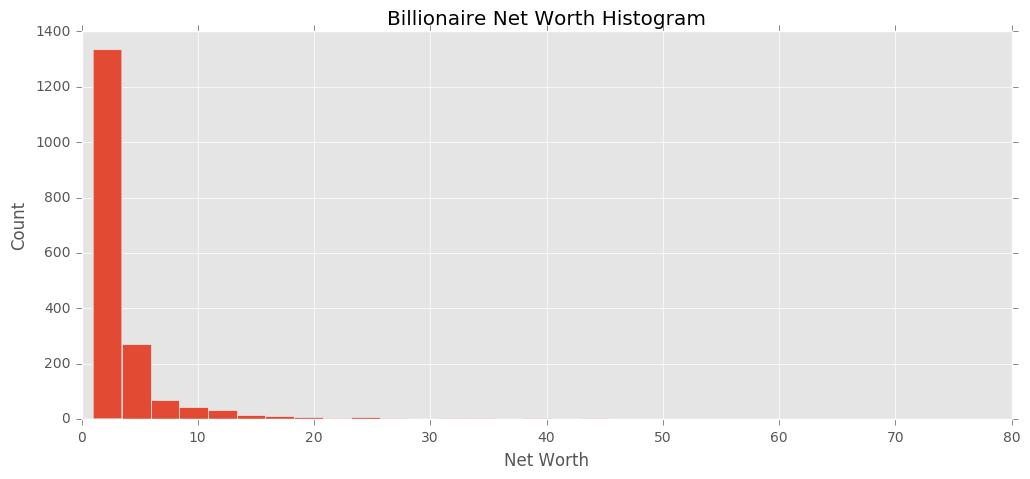

In [18]:
billionaires["Net Worth"].hist(bins=30)
plt.title("Billionaire Net Worth Histogram")
plt.xlabel("Net Worth")
plt.ylabel("Count")
plt.show()

In [19]:
overThirty = sum(billionaires["Net Worth"] > 30) / billionaireCount
overTwenty = sum(billionaires["Net Worth"] > 20) / billionaireCount
overTen = sum(billionaires["Net Worth"] > 10) / billionaireCount
overFive = sum(billionaires["Net Worth"] > 5) / billionaireCount
lessThanTwo = sum(billionaires["Net Worth"] < 2) / billionaireCount

print("{:%} of billionaires are worth more than $30 billion.".format(overThirty))
print("{:%} of billionaires are worth more than $20 billion.".format(overTwenty))
print("{:%} of billionaires are worth more than $10 billion.".format(overTen))
print("{:%} of billionaires are worth more than $5 billion.".format(overFive))
print("{:%} of billionaires are worth less than $2 billion.".format(lessThanTwo))

0.939227% of billionaires are worth more than $30 billion.
1.878453% of billionaires are worth more than $20 billion.
5.635359% of billionaires are worth more than $10 billion.
14.861878% of billionaires are worth more than $5 billion.
47.071823% of billionaires are worth less than $2 billion.


## Billionaires' Money Per Country

>Which country has the most money if we add all their billionaires together and how do they compare?


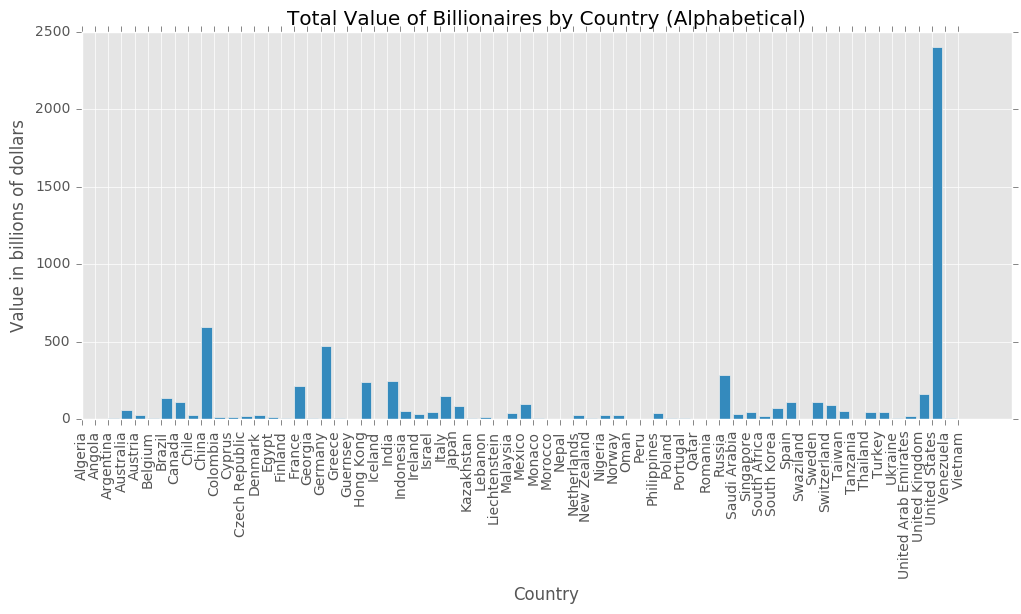

In [20]:
values = byCountry["Total"]

plt.bar(range(len(values)), values)
plt.xticks(range(len(values)), values.keys(), rotation=90)

plt.title("Total Value of Billionaires by Country (Alphabetical)")
plt.xlabel("Country")
plt.ylabel("Value in billions of dollars")

plt.show()

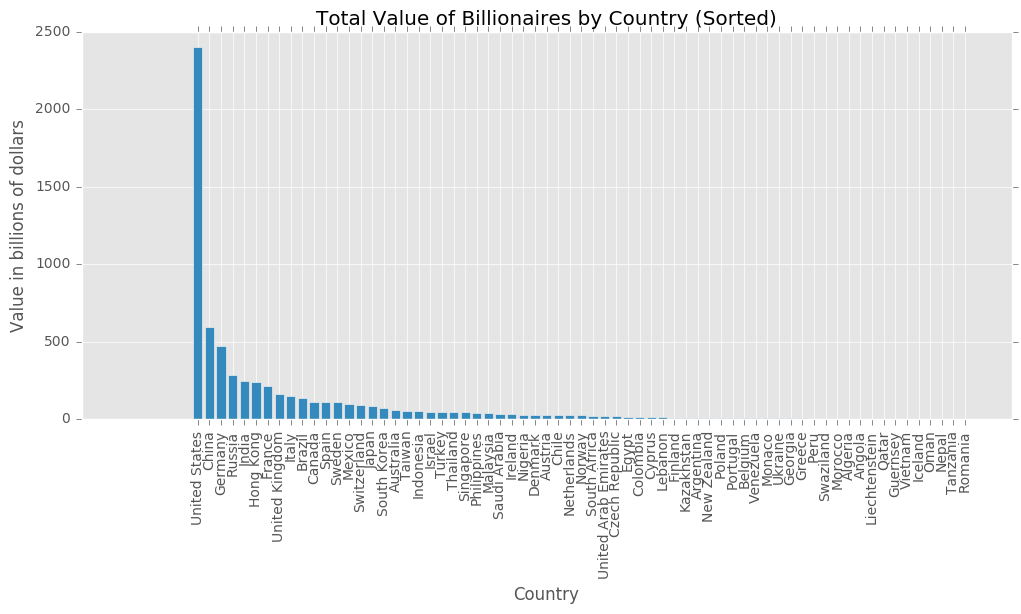

In [21]:
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(len(values)), sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(values)), sorted_values[:,0], rotation=90)

plt.title("Total Value of Billionaires by Country (Sorted)")
plt.xlabel("Country")
plt.ylabel("Value in billions of dollars")


plt.show()

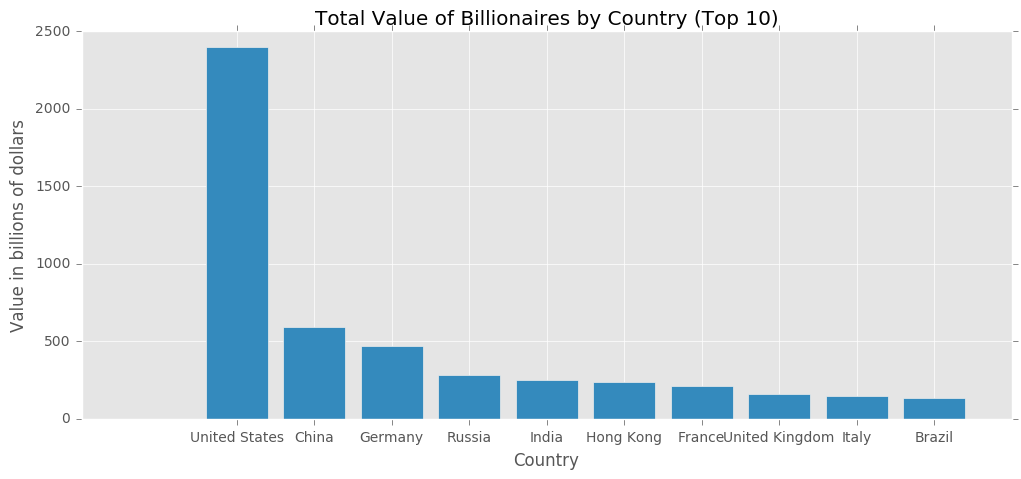

In [22]:
top_sorted_values = sorted_values[0:10,:]

plt.bar(range(len(top_sorted_values)), top_sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(top_sorted_values)), top_sorted_values[:,0])

plt.title("Total Value of Billionaires by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Value in billions of dollars")


plt.show()

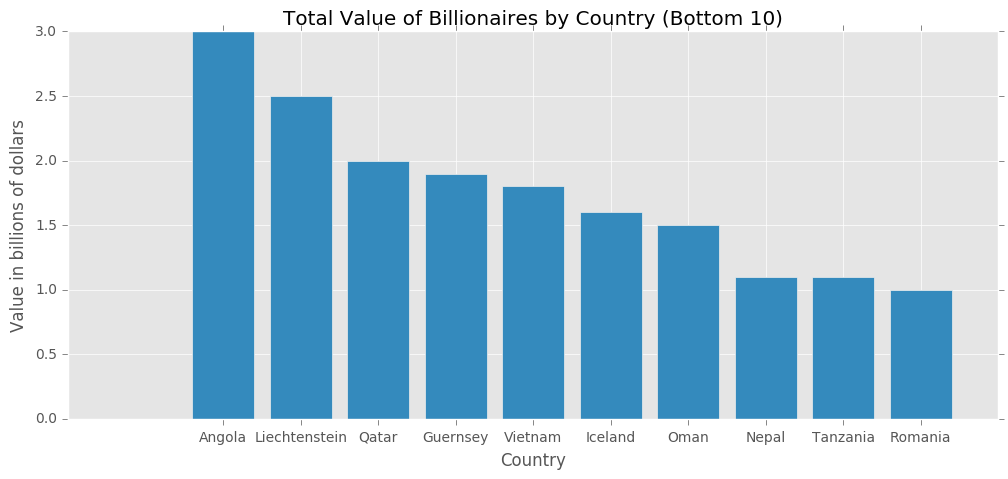

In [23]:
bottom_sorted_values = sorted_values[-10:,:]

plt.bar(range(len(bottom_sorted_values)), bottom_sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(bottom_sorted_values)), bottom_sorted_values[:,0])

plt.title("Total Value of Billionaires by Country (Bottom 10)")
plt.xlabel("Country")
plt.ylabel("Value in billions of dollars")


plt.show()

This is kind of interesting in that most countries seem to have at least a billionaire and those who have just one have ones who make more than just 1 billion.

## Billionaire Ages

>How does age correlate to how rich you are given that you are a billionaire? What is the distribution of billionaire's ages?


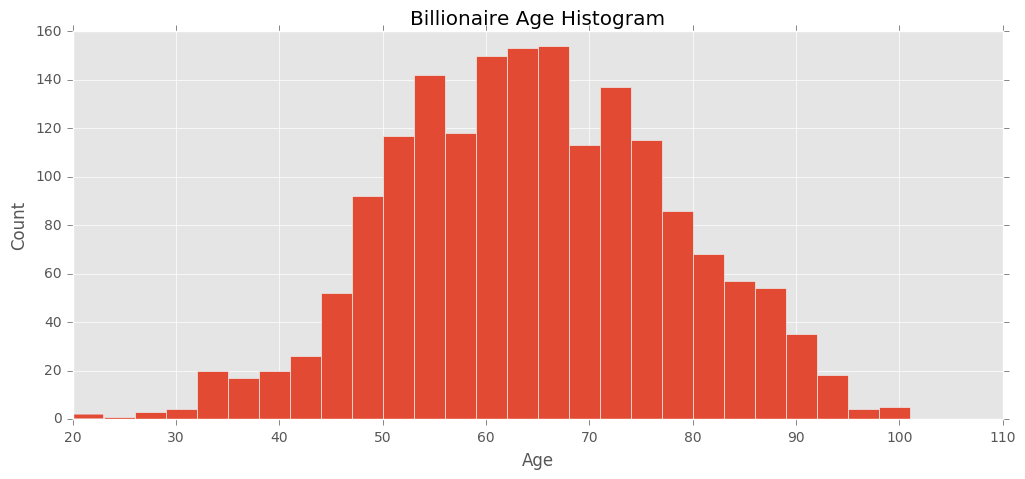

In [24]:
billionaires["Age"].hist(bins=27)
plt.title("Billionaire Age Histogram")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## Billionaire Industries

>How does industry correlate to how rich you are given that you are a billionaire, and which industries have the most billionaires?


In [25]:
totalWorth = billionaires.groupby('Source')['Net Worth'].sum()
averageWorth = billionaires.groupby('Source')['Net Worth'].mean()
medianWorth = billionaires.groupby('Source')['Net Worth'].median()
count = billionaires.groupby('Source')['Net Worth'].count()

byIndustry = pd.DataFrame({
    "Total": totalWorth,
    "Average": averageWorth,
    "Median": medianWorth,
    "Count": count
})

byIndustry.head()

,Average,Count,Median,Total
Source,,,,
AOL,1.3,1,1.3,1.3
Airbnb,3.3,3,3.3,9.9
Airlines,2.5,2,2.5,5.0
"Aldi, Trader Joe's",20.3,1,20.3,20.3
Amazon.com,45.2,1,45.2,45.2


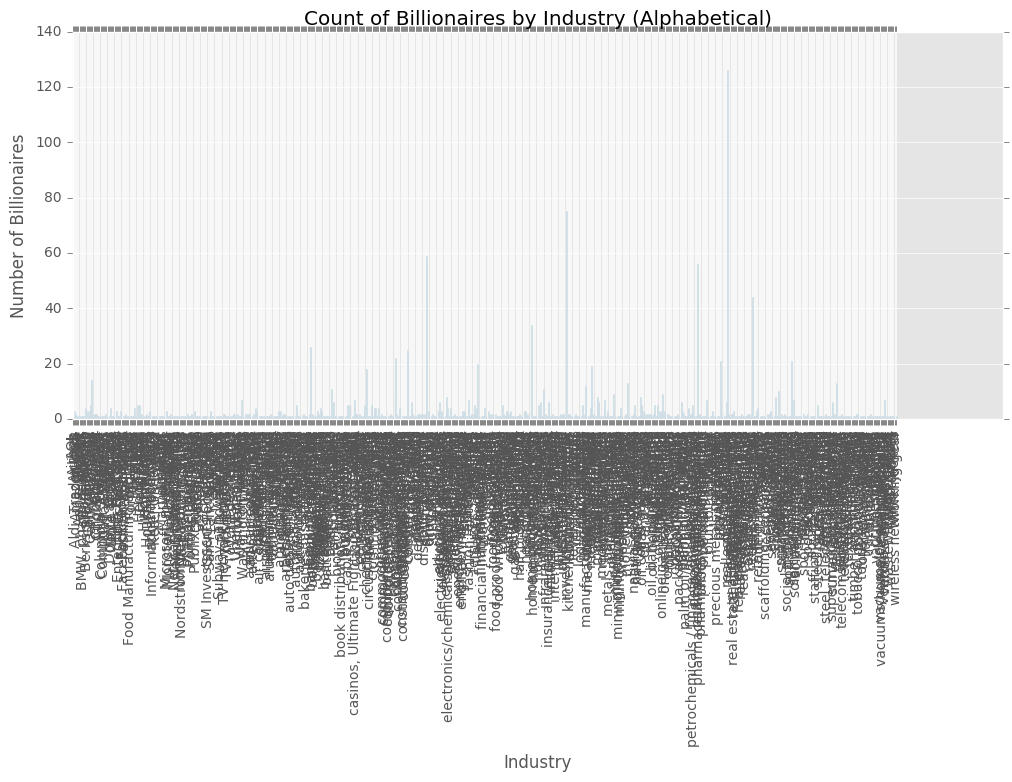

In [26]:
values = byIndustry["Count"]

plt.bar(range(len(values)), values)
plt.xticks(range(len(values)), values.keys(), rotation=90)

plt.title("Count of Billionaires by Industry (Alphabetical)")
plt.xlabel("Industry")
plt.ylabel("Number of Billionaires")

plt.show()

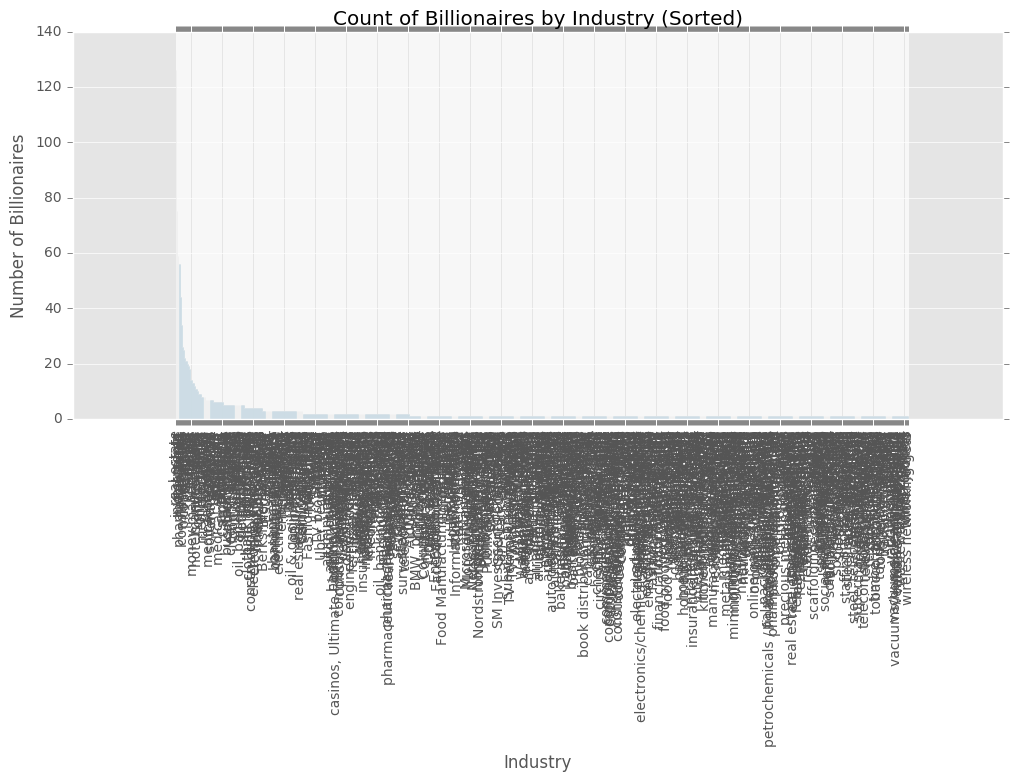

In [27]:
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(len(values)), sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(values)), sorted_values[:,0], rotation=90)

plt.title("Count of Billionaires by Industry (Sorted)")
plt.xlabel("Industry")
plt.ylabel("Number of Billionaires")


plt.show()

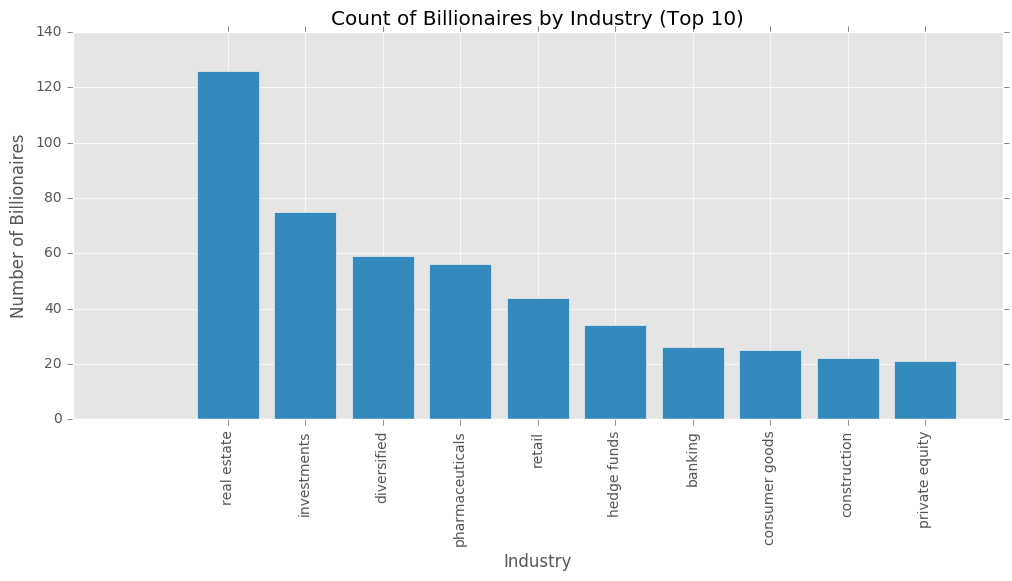

In [28]:
top_sorted_values = sorted_values[0:10,:]

plt.bar(range(len(top_sorted_values)), top_sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(top_sorted_values)), top_sorted_values[:,0], rotation=90)

plt.title("Count of Billionaires by Industry (Top 10)")
plt.xlabel("Industry")
plt.ylabel("Number of Billionaires")


plt.show()

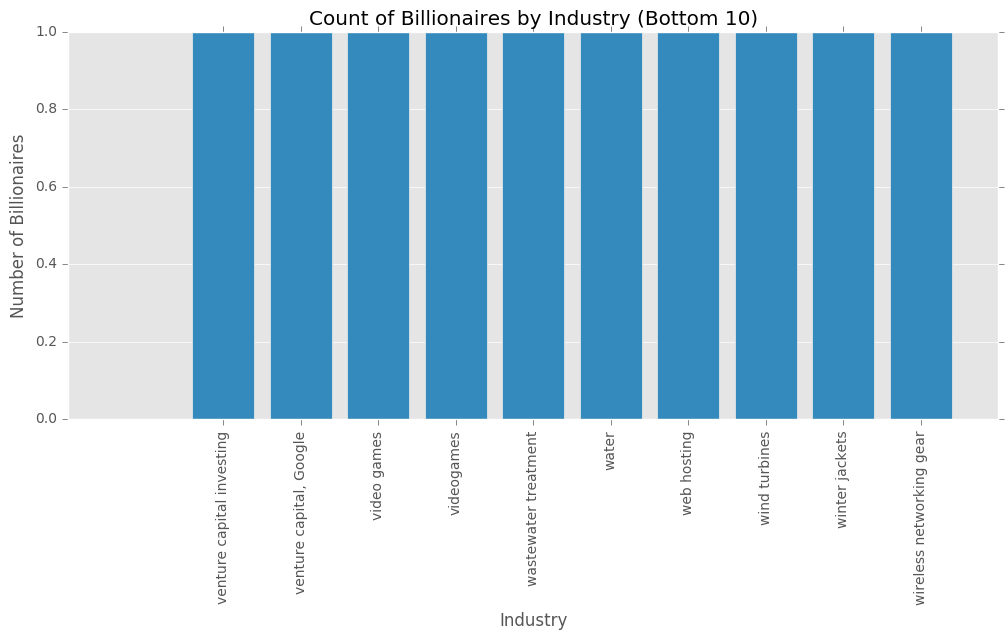

In [29]:
bottom_sorted_values = sorted_values[-10:,:]

plt.bar(range(len(bottom_sorted_values)), bottom_sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(bottom_sorted_values)), bottom_sorted_values[:,0], rotation=90)

plt.title("Count of Billionaires by Industry (Bottom 10)")
plt.xlabel("Industry")
plt.ylabel("Number of Billionaires")


plt.show()

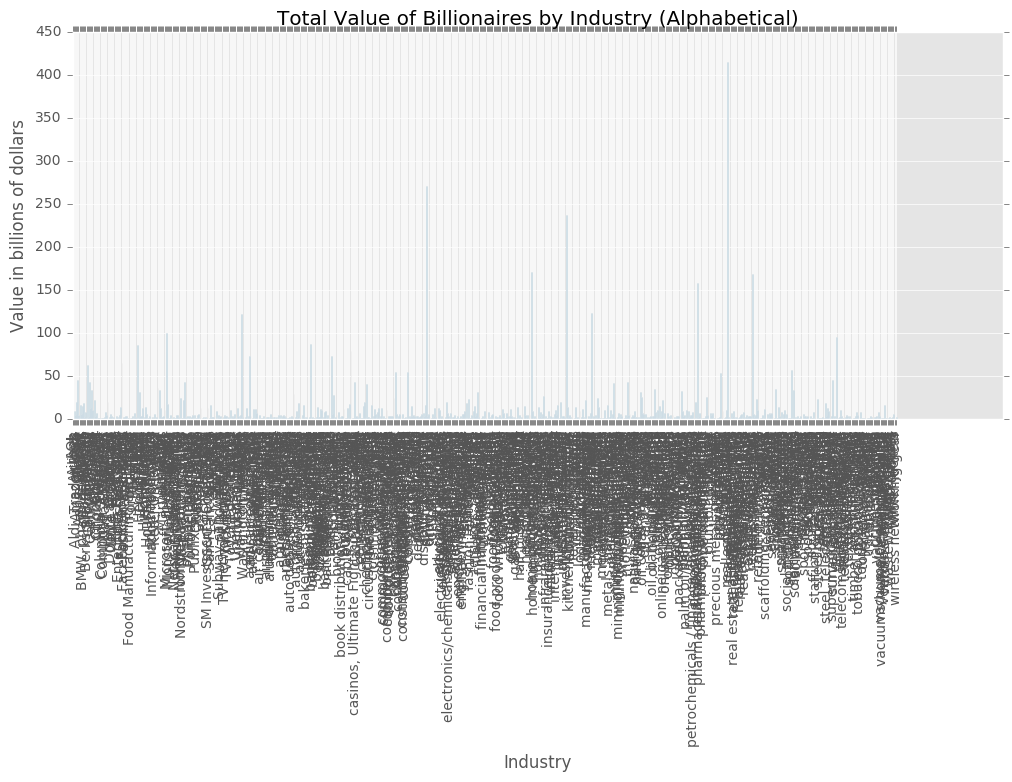

In [30]:
values = byIndustry["Total"]

plt.bar(range(len(values)), values)
plt.xticks(range(len(values)), values.keys(), rotation=90)

plt.title("Total Value of Billionaires by Industry (Alphabetical)")
plt.xlabel("Industry")
plt.ylabel("Value in billions of dollars")

plt.show()

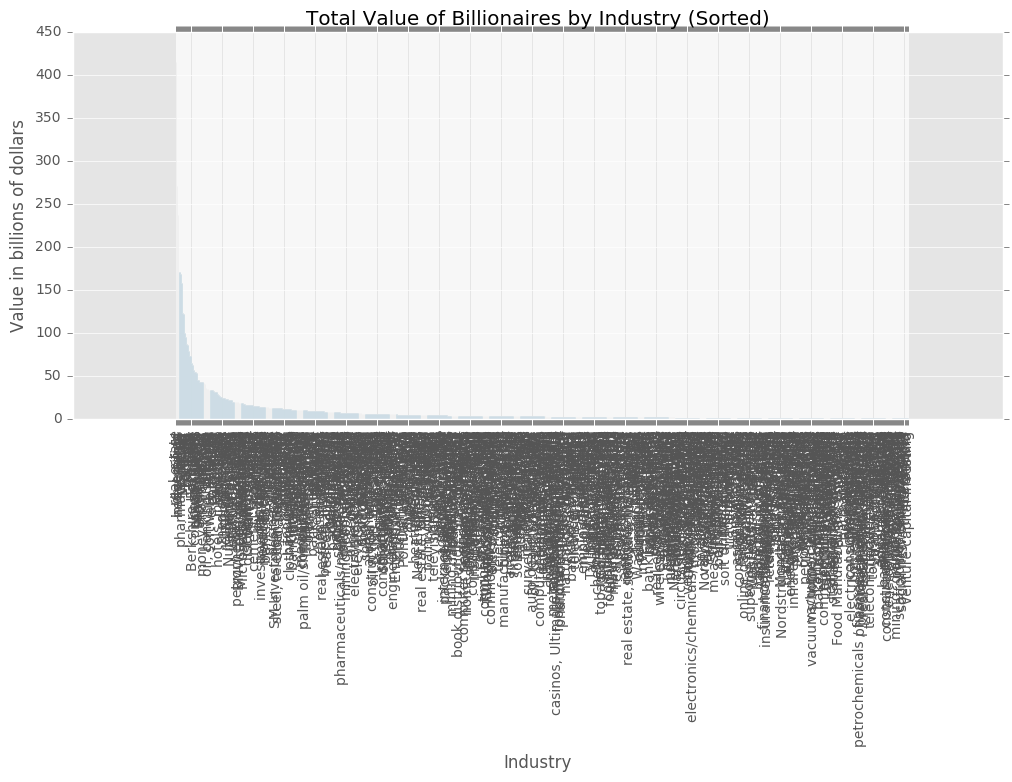

In [31]:
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(len(values)), sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(values)), sorted_values[:,0], rotation=90)

plt.title("Total Value of Billionaires by Industry (Sorted)")
plt.xlabel("Industry")
plt.ylabel("Value in billions of dollars")


plt.show()

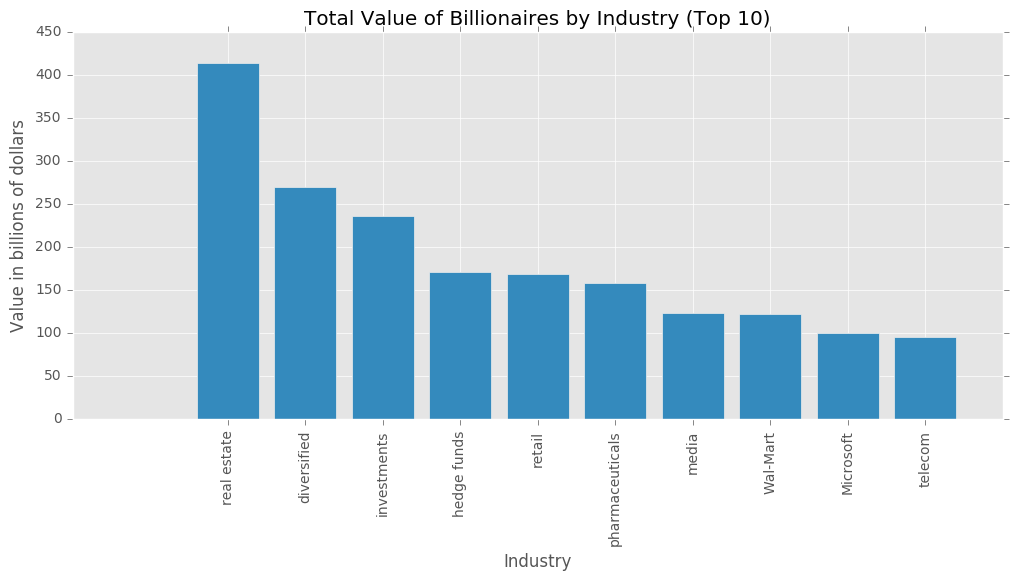

In [32]:
top_sorted_values = sorted_values[0:10,:]

plt.bar(range(len(top_sorted_values)), top_sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(top_sorted_values)), top_sorted_values[:,0], rotation=90)

plt.title("Total Value of Billionaires by Industry (Top 10)")
plt.xlabel("Industry")
plt.ylabel("Value in billions of dollars")


plt.show()

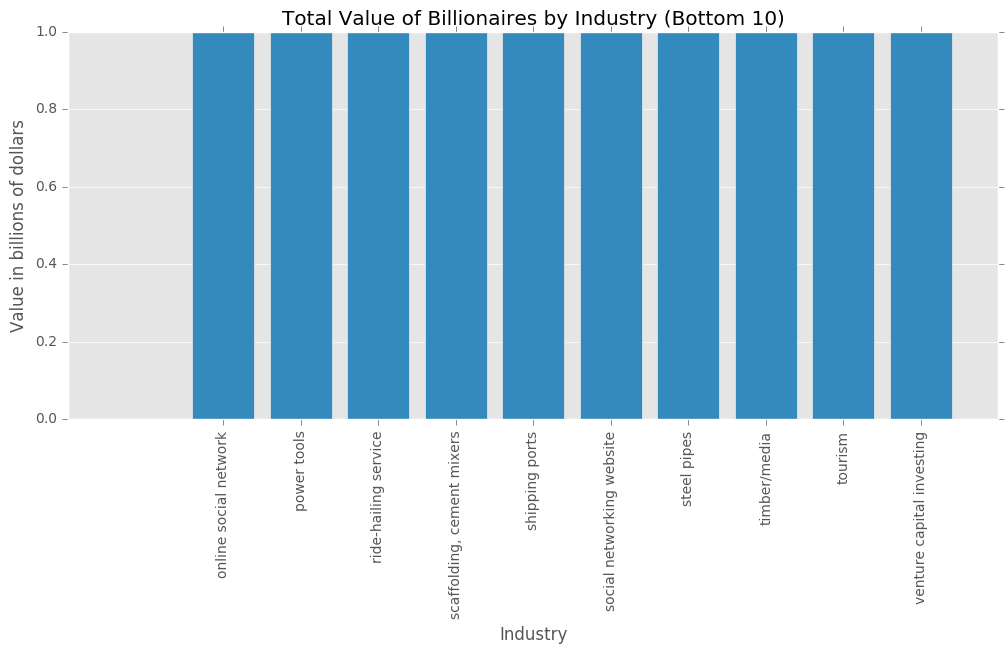

In [33]:
bottom_sorted_values = sorted_values[-10:,:]

plt.bar(range(len(bottom_sorted_values)), bottom_sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(bottom_sorted_values)), bottom_sorted_values[:,0], rotation=90)

plt.title("Total Value of Billionaires by Industry (Bottom 10)")
plt.xlabel("Industry")
plt.ylabel("Value in billions of dollars")


plt.show()

The source classifications in the dataset do not appear to be that great for grouping people. We may want to reclassify them into more useful groups.

In [34]:
industries = billionaires.groupby("Source").groups.keys()
print("There are {} industries listed, but we can probably re-categorize many of them.".format(len(industries)))
print("They are listed below: \n")

for i in industries:
    print(i, byIndustry["Count"][i])

There are 709 industries listed, but we can probably re-categorize many of them.
They are listed below: 

motorcycles 2
banking, media 1
Comcast 1
electrical equipment 3
Nordstrom department stores 1
chemicals 18
bakeries/fast-food outlets 1
electrical power equipment 1
transport/logistics 1
pipe manufacturing 1
Pharmacies 1
Nascar, racing 1
antennas 1
security software 1
steel production 1
biotech, investments 1
retailing 4
bakery chain 1
steel pipes 1
Emil Frey Group 1
construction, investments 4
mining 9
drug distribution 1
circus, live entertainment 1
measuring instruments 1
food distribution 2
media, tech 1
home, office products 1
Reebok 1
communications 1
insurance 6
robotics 1
agriculture, water 1
shipping, seafood 1
cement, airport 1
packaging 6
food wholesale and retail 1
pizza 1
Bloomberg LP 3
gas stations, utilities 1
photovoltaic equipment 1
telecom, oil 1
tourism 1
duty-free 1
fashion retail 7
mining, banking 1
online games 9
Minecraft 1
health care 3
airline, diversified 

In [35]:
# Let's create an industry column for billionaires that combines more people together and fixes any incorrect data.
# This is just one attempt at combining sources. It is an opinionated method and others might choose to
# categorize these industries differently. Despite there potentially being an error in categorizing some people
# there is some level of information that can be gained from this that should help in understanding how the
# industries play a role. If there's more than one source providing the net worth, I generally use the first one
# unless I can extrapolate some value in the combination that would place them in another category.

def getIndustryFromSource(source):
    if source.lower() in ["microsoft", "amazon.com", "facebook", "facebook, palantir", "facebook, investments", 
                          "google", "aol", "airbnb", "apple", "best buy",
                          "computer associates", "oracle", "dell", "it consulting", "software", "comcast",
                          "infrared imaging systems", "computer services/tourism", "dropbox", "apple, disney",
                         "electronics", "dolby laboratories", "groupon", "information technology", "intel",
                         "linkedin", "microsoft, investments", "minecraft", "netflix", "netscape, investments",
                         "pinterest", "samsung", "snapchat", "twitter", "uber", "uber technologies", "wework",
                         "whatsapp", "xerox", "yahoo", 'computer hardware', 'computer services, real estate',
                          'computer services/telecoms', 'computers', "drones", "ebay", "e-commerce", "antennas",
                         "flipkart", 'art, electronics', "sap", "internet services", "internet search", 
                          'smartphone games', 'smartphone screens', 'smartphones','online gambling', 'online games',
                          'online games, investments', 'online media', 'online payment service', 'online retail', 
                          'online retailing', 'online social network', 'online video', 'mobile chat service',
                          'mobile phones', "sensors", "internet media", 'electrical equipment', 
                          'electrical power equipment', 'electronic components', 'electronics components', 
                          'electronics retailer', 'electronics/chemicals/household products','internet',
                         "software services", "business software", "semiconductors", "acoustic components",
                         "surveillance equipment", "mapping software", "software, investments", "videogames",
                         "web hosting", "wireless networking gear", "navigation equipment", "ride-hailing service",
                         "lasers", "social networking website", "video games", "software firm", "laboratory services",
                         "printing", "security software", "optical components", "advanced ceramics", "robotics",
                         "magnetic switches"]:
        return "Tech"
    elif source.lower() in ["comcast", "directv", "telecom", 'communications', 'communications equipment',
                           "satellite tv", 'telecom equipment', 'telecom services', 'telecom, oil',
                            'telecommunications', 'telecoms/lotteries/insurance', "internet, telecom", 
                            'internet service provider', 'internet, auto parts',"utilities, telecom",
                           "mobile telecom"]:
        return "Telecom"
    elif source.lower() in ["berkshire hathaway", "bloomberg lp", "citigroup", "hedge funds", "hedge fund",
                           "quicken loans", "td ameritrade", 'bank, gas', 'bank, media', 'banking',
                            'banking equipment', 'banking, IT, real estate', 'banking, credit cards',
                            'banking, development', 'banking, healthcare', 'banking, insurance', 'banking, investments',
                            'banking, media', 'banking, minerals', 'banking, real estate', 'banking, shipping',
                            'banking, tobacco', 'banks, real estate','auto loans', "asset management",
                            'banking, it, real estate', "investments", 'commodities', 'commodities trading',
                            'commodities, infrastructure', 'finance', 'finance, diversified', 'finance, energy',
                            'financial data', 'financial information', 'financial information service', 
                            'financial services', "hinduja group", "orkla", "sm investments corporation",
                            "ss&c technologies", 'venture capital', 'venture capital investing', 
                            'venture capital, google', "discount brokerage", 'electronic trading', 'insurance',
                            'insurance, banking, real estate', 'insurance, beverages', 'insurance, investments',
                           'investment', 'investment banking', 'investment research', 'mutual funds',
                           'money management','private banking', 'private equity', "conglomerate", "leveraged buyouts",
                           "consulting", "temp agency", "outsourcing, football", "payroll services",
                           "employment agency", "trading company", "staffing & recruiting firm", "sourcing",
                           "amway", "advertising", 'billboards', 'billboards, hotels', "outsourcing"]:
        return "Business & Finance"
    elif source.lower() in ["aldi, trader joe's", "armani", "columbia sportswear", "chanel", "dolce & gabbana",
                           "estee lauder", "fashion and retail", "gap", "h&m", "hermes", "home depot", "jewelry",
                           "l'oreal", "lego", "lululemon", "new balance", "nike", "nordstrom department stores", "prada",
                           "publix", "publix supermarkets", "ralph lauren", "reebok", "retail", "retailing",
                            "sears", "under armour", "urban outfitters", "wal-mart", "wal-mart, logistics",
                            "zara", "consumer goods", 'apparel', 'apparel retailer', 'apparel, real estate',
                            'appliance retailer', 'appliances', 'eyeglasses', 'fashion', 'fashion retail',
                            'fashion retailer','fashion, entertainment', 'art collection, swatch','clothing retail',
                            'clothing, investments', 'department stores', 'consumer electronics', "cosmetics",
                           "lvmh", "spanx", "consumer products", 'retail & gas stations', 'retail, investments',
                            'retail, media', 'retail, real estate', 'retailing, investments','shoes',
                            'shopping centers', 'shopping malls','sporting goods', 'sporting goods retail',
                            'sports apparel', 'sports concessions', 'sports retailing', "supermarkets",
                            'supermarkets, investments', "sportswear", 'footwear', 'footwear, apparel', 
                            'grocery stores', "cleaning products", "luxury goods", "hygiene products", 
                           "kitchen appliances", "home appliances", "sunglasses", "vacuums", "home improvement stores",
                           "coffee makers", "diapers", "hair products, tequila", "kitchen, plumbing retailer",
                           "tobacco distribution, retail", "umbrellas", "intimate wear", "hair products",
                           "home, office products", "winter jackets", "vacuums/home cleaning products",
                            "vacuums/cleaning products", "beauty products","toys, entertainment", "fine jewelry",
                           "blinds"]:
        return "Retail & Consumer Goods"
    elif source.lower() in ["barilla pasta", "campbell soup", "cargill", "coca-cola", "chobani yogurt",
                            "food manufacturing and retail", "chick-fil-a", "heineken", "ketel one vodka",
                            "monster energy drinks", "nutella, chocolates", "red bull", "starbucks",
                            "subway sandwich shops", 'bakeries', 'bakeries/fast-food outlets', 'bakery chain',
                           "dole, real estate", "alcohol", "beverages", "food", 'beer', 'beer, investments','candy',
                           'cheese', 'chewing gum', 'cigarette packaging', "coffee", "salsa", 'snack foods',
                            'snacks, beverages','dairy', 'dairy farms', 'dairy products','energy drinks', "fast food",
                           'food distribution', 'food manufacturing', 'food processing', 'food production',
                            'food products/entertainment', 'food retailing', 'food services', 
                            'food wholesale and retail', 'food, beverages', 'frozen foods', "pizza", "meat processing",
                           "flavorings", "restaurants", "spirits", "water", "soy sauce maker", "soy sauce",
                           "orange juice", "liquor", "soft drinks", "soft drinks, diversified"]:
        return "Food & Beverage"
    elif source.lower() in ["cirque du soleil", "marvel comics", "media", "movies", "musical theater", "star wars",
                           "tv", "tv broadcasting", "tv network, investments", "tv shows", "tv shows, movies",
                            "tv, movie production", "virgin", "animation", "entertainment", 'art', 'art collection',
                           'cable tv, investments', 'cable television', "amusement parks", 'television',
                            'television, univision', 'television, real estate','circus, live entertainment',
                           'gambling', 'gambling software','media, investments', 'media, real estate', 
                            'media, retail', 'media, tech', "movie making", "casinos", "publishing", 
                            "pachinko machines", "casinos, ultimate fighting championship", "record label",
                           "pachinko parlors", "restaurants, casinos", "ticketing service"]:
        return "Gambling & Entertainment"
    elif source.lower() in ["dallas cowboys", "formula one", "houston rockets", "indianapolis colts", "nascar, racing",
                           "new england patriots", "new orleans saints", "philadelphia eagles", 
                           "san francisco 49ers", "washington redskins", "sports", 'sports team', 'sports teams',
                            'sports, real estate', "basketball, car dealers"]:
        return "Sports"
    elif source.lower() in ["airlines",  "easyjet", "carnival cruises", "enterprise rent-a-car", "fedex",
                            "hotels", "u-haul","aviation", 'aircraft leasing', 'airline, diversified', 'airport',
                            'airports, investments','book distribution, transportation', 'budget airline',
                            "transportation", 'cruise ships', "nordic aviation capital", 'shipping', 
                            'shipping ports', 'shipping, seafood',"packaging", "logistics", "ports", 
                            "regional airline", "self storage", "package delivery service", "logistics/real estate",
                           "travel", "hotels, diversified", "transport/logistics", "duty-free", "storage facilities",
                           "tourism"]:
        return "Travel, Transportation & Logistics"
    elif source.lower() in ["ikea", "furniture", 'furniture retailing',]:
        return "Furniture"
    elif source.lower() in ["pharmaceuticals", "pharmacies", "slim-fast", 'biotech', 'biotech, investments', 
                            'biotechnology', 'blood testing', "roche holding", "drugstores", "prosthetics", 
                            'vaccine production', 'vaccines', 'drug distribution', 'drug store chain', 'drug stores', 
                            'drugstore chain', 'health it', 'health care', 'healthcare', 'hearing aids',
                            'dental implants', 'dental products','generic drugs', 'hospitals', 
                            'hospitals, health care', 'medical devices', 'medical equipment', 'medical facilities', 
                            'medical patents', 'medical products', 'medical technologies', 'medical technology', 
                            'medical tests','pharmaceuticals, diversified', 'pharmaceuticals/medical equipment', 
                            'pharmacies, drug distribution', "optometry", "nutrition supplements", 
                            "synthetic gloves"]:
        return "Pharma"
    elif source.lower() in ["real estate", "construction", "condos", 'construction equipment', "balder",
                            'construction materials', 'construction, chemicals', 'construction, investments',
                            'construction, media', 'construction, mining', 'construction, pipes, banking',
                            'construction, pipes, chemicals', 'construction, real estate', "pontiac land group",
                           "investments, real estate", 'real estate, diversified','real estate, education',
                            'real estate, finance', 'real estate, hotels', 'real estate, investments',
                            'real estate, investments, logistics', 'real estate, manufacturing',
                            'real estate, media', 'real estate, oil, cars', 'real estate, plush toys',
                            'real estate, private equity', 'real estate, retail', 'real estate, shipbuilding',
                            'real estate, shipping', 'real estate/investments', 'building materials',
                            'casinos, hotels', 'casinos, real estate', 'office real estate','hotels, investments',
                           "property", "engineering, construction", "engineering", "palm oil/shipping/real estate",
                           "plumbing fixtures", "roofing", "development", "flooring", "copper, real estate",
                           "property, retail", "homebuilding", "home building materials", "tourism, construction",
                           "scaffolding, cement mixers"]:
        return "Real Estate & Construction"
    elif source.lower() in ["getty oil", 'aluminum', 'aluminum products', 'aluminum, diversified', 
                            'aluminum, utilities', 'coal', 'coal mine', 'coal, fertilizers', "oil",
                            "petrochemicals, oil & gas", 'steel', 'steel pipes', 'steel pipes, diversified',
                            'steel production', 'steel smelting', 'steel, coal', 'steel, diversified',
                            'steel, investments', 'steel, mining', 'steel, telecom, investments',
                            'steel, transport','oil & gas', 'oil & gas, banking', 'oil & gas, investments',
                            'oil and gas', 'oil and gas/lottery', 'oil refinery', 'oil refining', 'oil services',
                            'oil trading', 'oil, banking', 'oil, banking, real estate', 'oil, banking, telecom',
                            'oil, diversified', 'oil, fertilizers', 'oil, investments', 'oil, real estate',
                            'oil, transportation','energy', 'energy investments', 'energy services', 
                            'energy, investments', 'energy, media, banking', 'energy, sports', 
                            'energy, waste, chemicals',"chemicals", "chemicals, investments", 'cement', 'cement, airport',
                            'cement, diversified', 'cement, sugar', 'cement, sugar, flour', "gas, chemicals", 
                            'fertilizer', 'fertilizer, real estate', 'fertilizers', 'gas', 'gas desulfurization',
                            'gas stations, retail', 'gas stations, utilities','manufacturing', 'manufacturing, investments',
                           'mining', 'mining investments', 'mining, banking', 'mining, banking, hotels', 
                            'mining, copper products', 'mining, diamonds, real estate', 'mining, metals', 
                            'mining, metals, machinery', 'mining, steel','natural gas', 'natural gas distribution',
                           'petrochemicals', 'petrochemicals / finance / media / electronics', 
                            'petroleum, diversified','metal processing', 'metals', 'metals, banking, fertilizers', 
                            'metals, energy', 'metals. coal', 'metalworking tools', 'renewable energy', "pipelines",
                           "paints", "elevators, escalators", "paper", "fasteners", "palm oil", "diamond jewelry",
                           "diamonds", "tires", "hotels, energy", "wind turbines", "heating equipment",
                           "palm oil, real estate", "polyester", "solar panel materials", "drilling, shipping",
                           "pipe manufacturing", "timberland, lumber mills", "machine tools", "trucking", 
                           "tractors", "shipbuilding", "power", "solar panel components", "forestry, mining",
                           "plastics", "air compressors, drills", "lithium batteries", "photovoltaic equipment",
                           "heavy equipment", "air coolers","air conditioning", "palm oil/real estate",
                           "valve manufacturing", "precious metals, real estate", "power tools", "timber",
                           "timber/media"]:
        return "Oil, Chemicals, Energy & Manufacturing"
    elif source.lower() in ["bmw", "bmw, pharmaceuticals","ford motor", "toyota dealerships", "tesla motors",
                            'auto dealers, investments', 'auto parts', 'auto repair', 'automobiles', 
                            'automobiles, batteries', 'automotive', 'automotive brakes', 'automotive systems', 
                            'autoparts',  'batteries, autos', 'batteries, mini motors', 'brakes','art, car dealerships',
                           "cars", "car dealerships", "emil frey group", 'motor vehicles', 'motorcycles', 'motors',]:
        return "Auto"
    elif source.lower() in ["education", "after school tutoring", 'educational services',]:
        return "Education"
    elif source.lower() in ["agriculture", 'agribusiness', 'agriculture, land', 'agriculture, water',
                            "tobacco, banking", "tobacco", "pest control", "animal feed", "pig breeding",
                           "poultry", "soybean trading"]:
        return "Agriculture"
    elif source.lower() in ['textiles', 'textiles, apparel', 'textiles, electronics',]:
        return "Textiles"
    elif source.lower() in ["diversified"] or "," in source.lower():
        return "Diversified"
    
    return source

def makeAllElseOther(source):
    if source not in ["Tech", "Telecom", "Business & Finance", "Retail & Consumer Goods","Food & Beverage", 
                      "Gambling & Entertainment", "Sports", "Travel, Transportation & Logistics", "Furniture", 
                      "Pharma", "Real Estate & Construction","Oil, Chemicals, Energy & Manufacturing", "Auto",
                     "Education", "Agriculture", "Textiles", "Diversified"]:
        print("{} will be labeled as Other.".format(source))
        return "Other"
    else:
        return source

billionaires["True Industry"] = billionaires.apply(lambda row: getIndustryFromSource(row["Source"]), axis=1)

billionaires["True Industry"] = billionaires.apply(lambda row: makeAllElseOther(row["True Industry"]), axis=1)

security will be labeled as Other.
pet food will be labeled as Other.
private security will be labeled as Other.
pet food will be labeled as Other.
truck stops will be labeled as Other.
measuring instruments will be labeled as Other.
security will be labeled as Other.
toll roads will be labeled as Other.
wastewater treatment will be labeled as Other.
leisure craft will be labeled as Other.
sewage treatment will be labeled as Other.
inherited will be labeled as Other.
sewage treatment will be labeled as Other.
train cars will be labeled as Other.
fish farming will be labeled as Other.
lighting will be labeled as Other.


In [36]:
totalWorth = billionaires.groupby('True Industry')['Net Worth'].sum()
averageWorth = billionaires.groupby('True Industry')['Net Worth'].mean()
medianWorth = billionaires.groupby('True Industry')['Net Worth'].median()
count = billionaires.groupby('True Industry')['Net Worth'].count()

byIndustry = pd.DataFrame({
    "Total": totalWorth,
    "Average": averageWorth,
    "Median": medianWorth,
    "Count": count
})

industries = billionaires.groupby("True Industry").groups.keys()
print("There are now {} industries, after recategorization.".format(len(industries)))
print("They are listed below: \n")

sorted_industries = byIndustry.sort_values("Total", ascending=False)
sorted_industries

There are now 18 industries, after recategorization.
They are listed below: 



,Average,Count,Median,Total
True Industry,,,,
Business & Finance,3.431475,305,2.00,1046.6
Retail & Consumer Goods,4.288285,239,2.20,1024.9
Tech,4.650515,194,2.00,902.2
"Oil, Chemicals, Energy & Manufacturing",3.060669,239,1.80,731.5
Real Estate & Construction,3.027027,222,2.00,672.0
Food & Beverage,3.857258,124,2.55,478.3
Pharma,2.733077,130,1.85,355.3
Gambling & Entertainment,3.858824,85,2.60,328.0
Diversified,4.387302,63,2.10,276.4


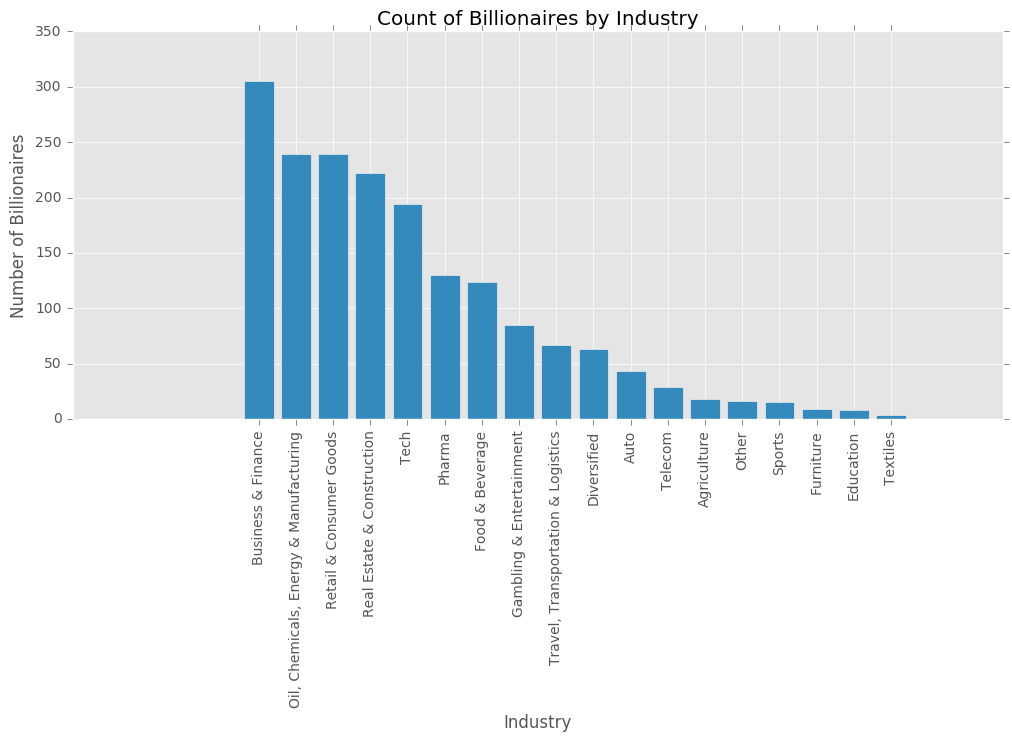

In [37]:
values = byIndustry["Count"]
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(len(sorted_values)), sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(sorted_values)), sorted_values[:,0], rotation=90)

plt.title("Count of Billionaires by Industry")
plt.xlabel("Industry")
plt.ylabel("Number of Billionaires")

plt.show()

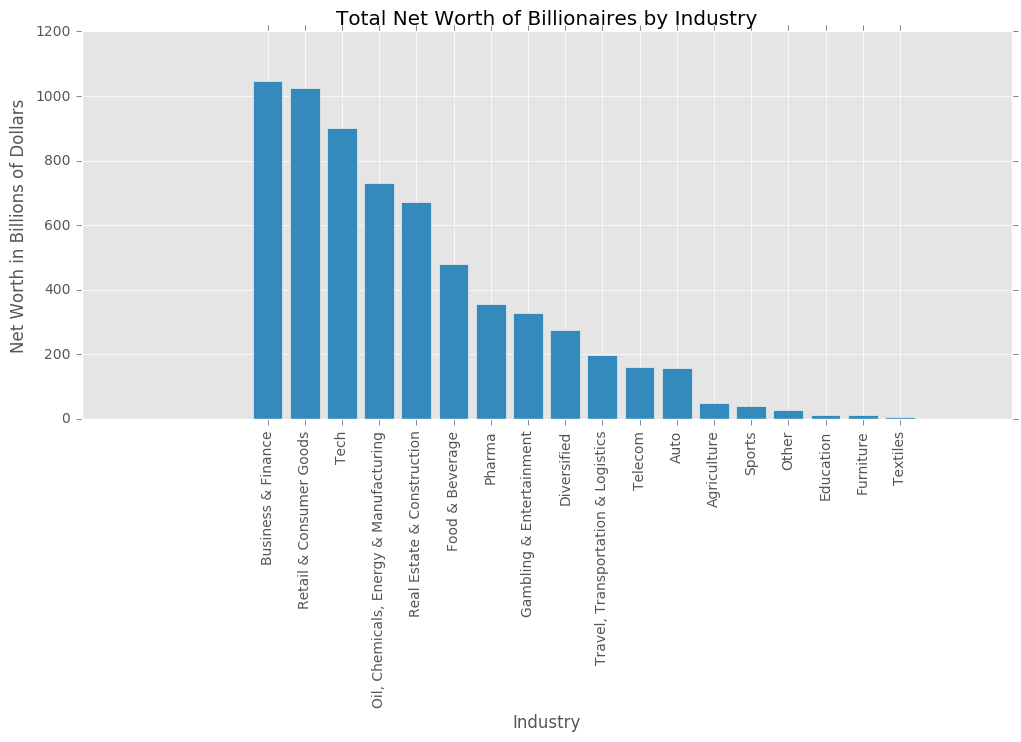

In [38]:
values = byIndustry["Total"]
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(len(sorted_values)), sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(sorted_values)), sorted_values[:,0], rotation=90)

plt.title("Total Net Worth of Billionaires by Industry")
plt.xlabel("Industry")
plt.ylabel("Net Worth in Billions of Dollars")

plt.show()

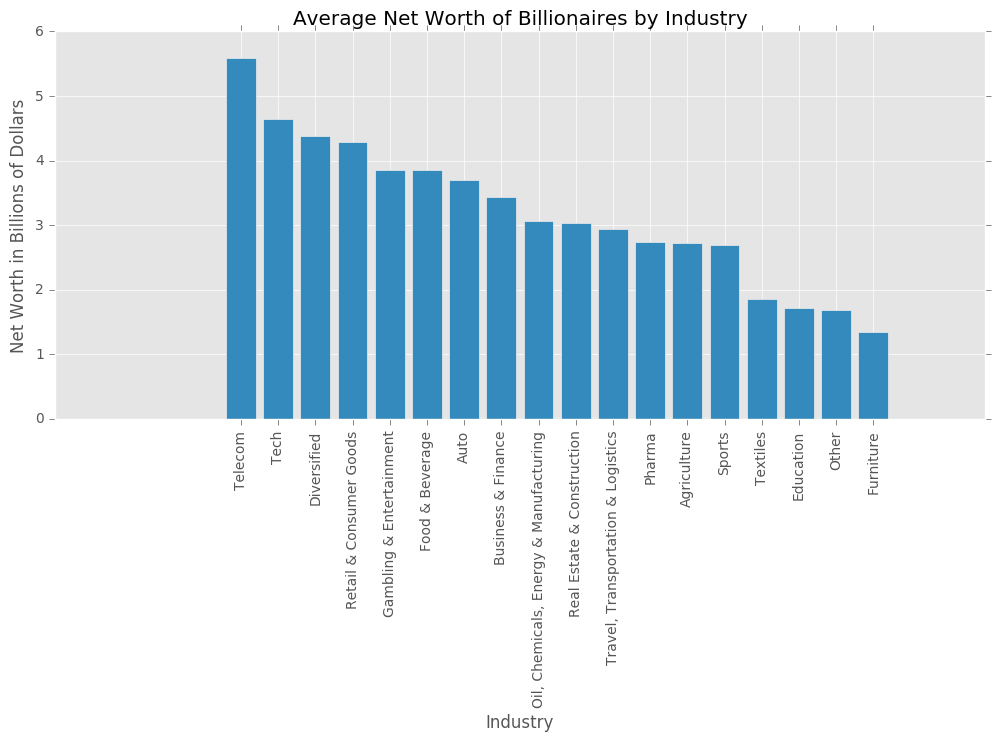

In [39]:
values = byIndustry["Average"]
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(len(sorted_values)), sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(sorted_values)), sorted_values[:,0], rotation=90)

plt.title("Average Net Worth of Billionaires by Industry")
plt.xlabel("Industry")
plt.ylabel("Net Worth in Billions of Dollars")

plt.show()

## Billionaire Genders

>How does gender correlate? Which countries have the most female billionaires and which have the highest percentage of female billionaries?


In [40]:
women = billionaires[billionaires["Female"] == 1]
men = billionaires[billionaires["Female"] == 0]

womenTotalWorth = women.groupby('True Industry')['Net Worth'].sum()
womenAverageWorth = women.groupby('True Industry')['Net Worth'].mean()
womenMedianWorth = women.groupby('True Industry')['Net Worth'].median()
womenCount = women.groupby('True Industry')['Net Worth'].count()

womenByIndustry = pd.DataFrame({
    "Total": womenTotalWorth,
    "Average": womenAverageWorth,
    "Median": womenMedianWorth,
    "Count": womenCount
})

menTotalWorth = men.groupby('True Industry')['Net Worth'].sum()
menAverageWorth = men.groupby('True Industry')['Net Worth'].mean()
menMedianWorth = men.groupby('True Industry')['Net Worth'].median()
menCount = men.groupby('True Industry')['Net Worth'].count()

menByIndustry = pd.DataFrame({
    "Total": menTotalWorth,
    "Average": menAverageWorth,
    "Median": menMedianWorth,
    "Count": menCount
})


womenTotalWorth = women.groupby('Country of Citizenship')['Net Worth'].sum()
womenAverageWorth = women.groupby('Country of Citizenship')['Net Worth'].mean()
womenMedianWorth = women.groupby('Country of Citizenship')['Net Worth'].median()
womenCount = women.groupby('Country of Citizenship')['Net Worth'].count()

womenByCountry = pd.DataFrame({
    "Total": womenTotalWorth,
    "Average": womenAverageWorth,
    "Median": womenMedianWorth,
    "Count": womenCount
})

menTotalWorth = men.groupby('Country of Citizenship')['Net Worth'].sum()
menAverageWorth = men.groupby('Country of Citizenship')['Net Worth'].mean()
menMedianWorth = men.groupby('Country of Citizenship')['Net Worth'].median()
menCount = men.groupby('Country of Citizenship')['Net Worth'].count()

menByCountry = pd.DataFrame({
    "Total": menTotalWorth,
    "Average": menAverageWorth,
    "Median": menMedianWorth,
    "Count": menCount
})

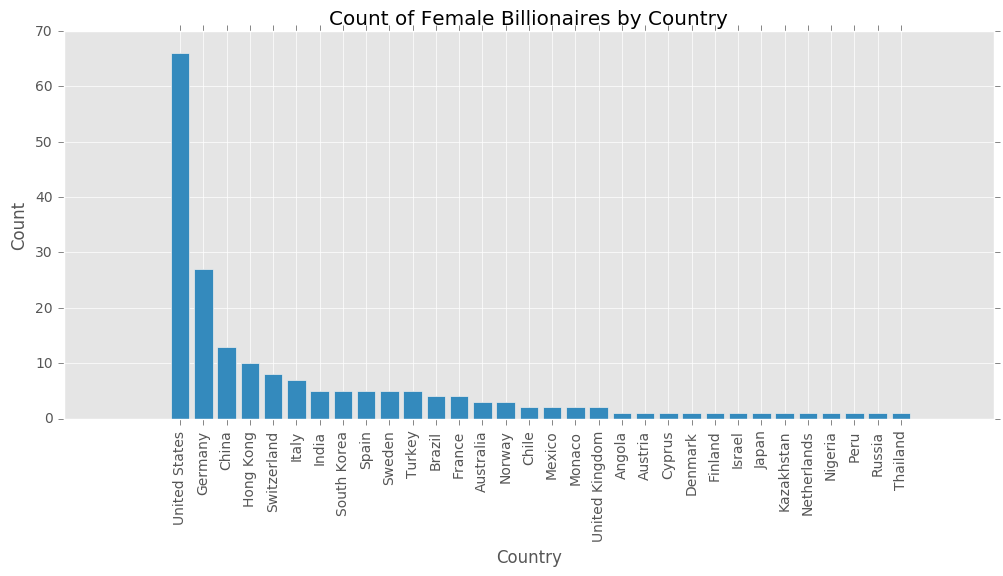

In [52]:
values = womenByCountry["Count"]
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(len(sorted_values)), sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(sorted_values)), sorted_values[:,0], rotation=90)

plt.title("Count of Female Billionaires by Country")
plt.xlabel("Country")
plt.ylabel("Count")

plt.show()

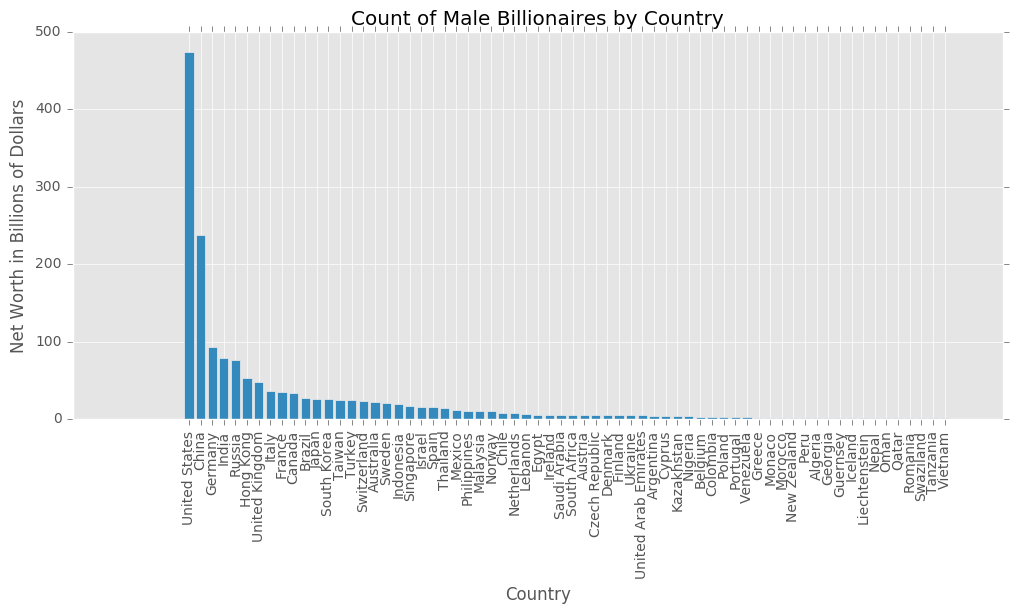

In [54]:
values = menByCountry["Count"]
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(len(sorted_values)), sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(sorted_values)), sorted_values[:,0], rotation=90)

plt.title("Count of Male Billionaires by Country")
plt.xlabel("Country")
plt.ylabel("Net Worth in Billions of Dollars")

plt.show()

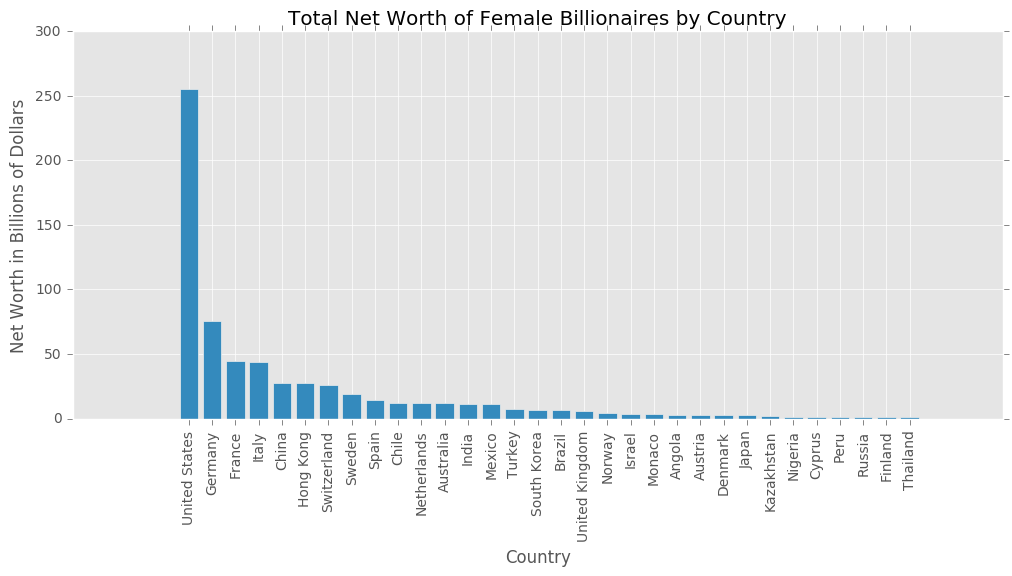

In [47]:
values = womenByCountry["Total"]
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(len(sorted_values)), sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(sorted_values)), sorted_values[:,0], rotation=90)

plt.title("Total Net Worth of Female Billionaires by Country")
plt.xlabel("Country")
plt.ylabel("Net Worth in Billions of Dollars")

plt.show()

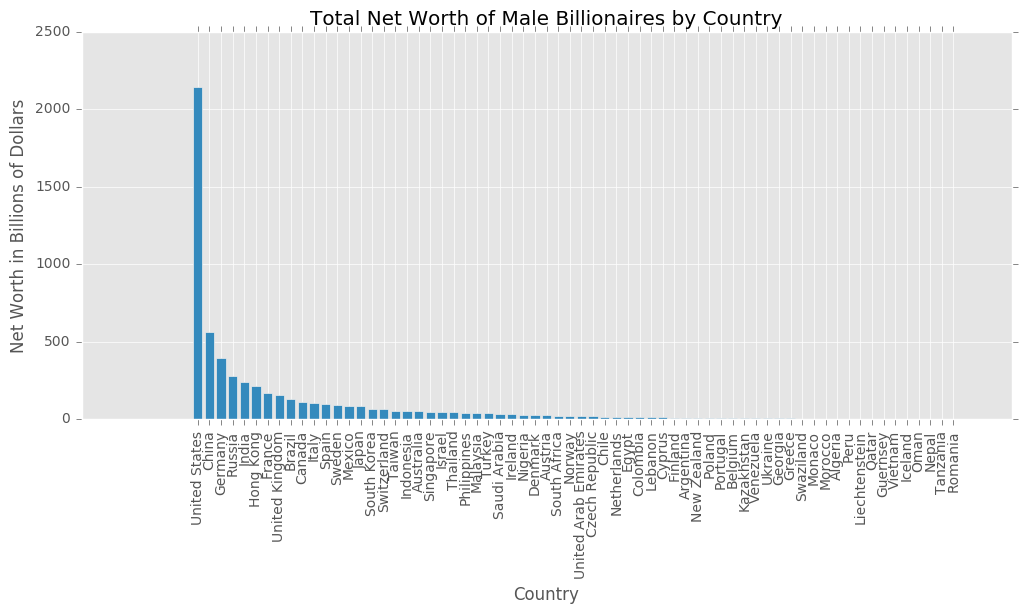

In [55]:
values = menByCountry["Total"]
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(len(sorted_values)), sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(sorted_values)), sorted_values[:,0], rotation=90)

plt.title("Total Net Worth of Male Billionaires by Country")
plt.xlabel("Country")
plt.ylabel("Net Worth in Billions of Dollars")

plt.show()

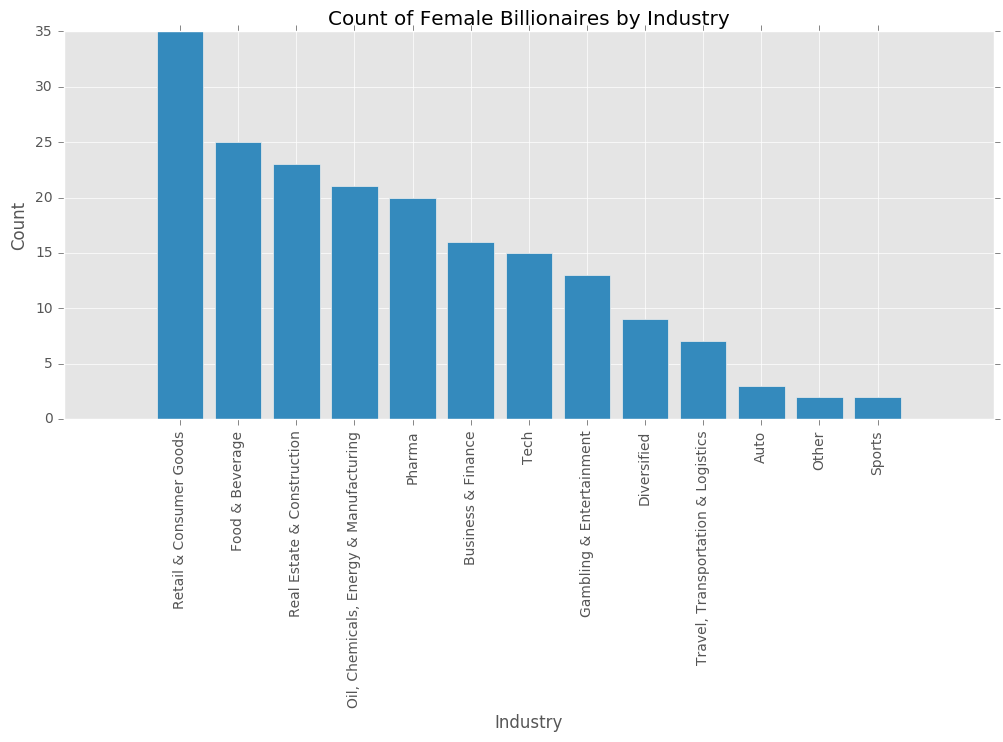

In [56]:
values = womenByIndustry["Count"]
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(len(sorted_values)), sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(sorted_values)), sorted_values[:,0], rotation=90)

plt.title("Count of Female Billionaires by Industry")
plt.xlabel("Industry")
plt.ylabel("Count")

plt.show()

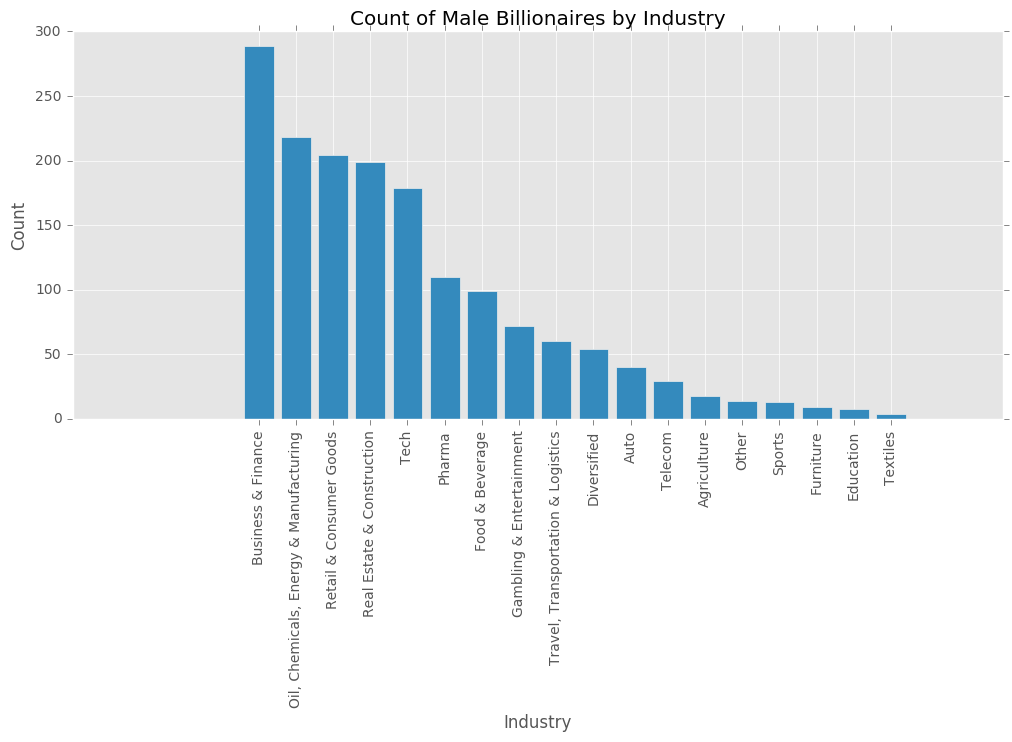

In [57]:
values = menByIndustry["Count"]
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(len(sorted_values)), sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(sorted_values)), sorted_values[:,0], rotation=90)

plt.title("Count of Male Billionaires by Industry")
plt.xlabel("Industry")
plt.ylabel("Count")

plt.show()

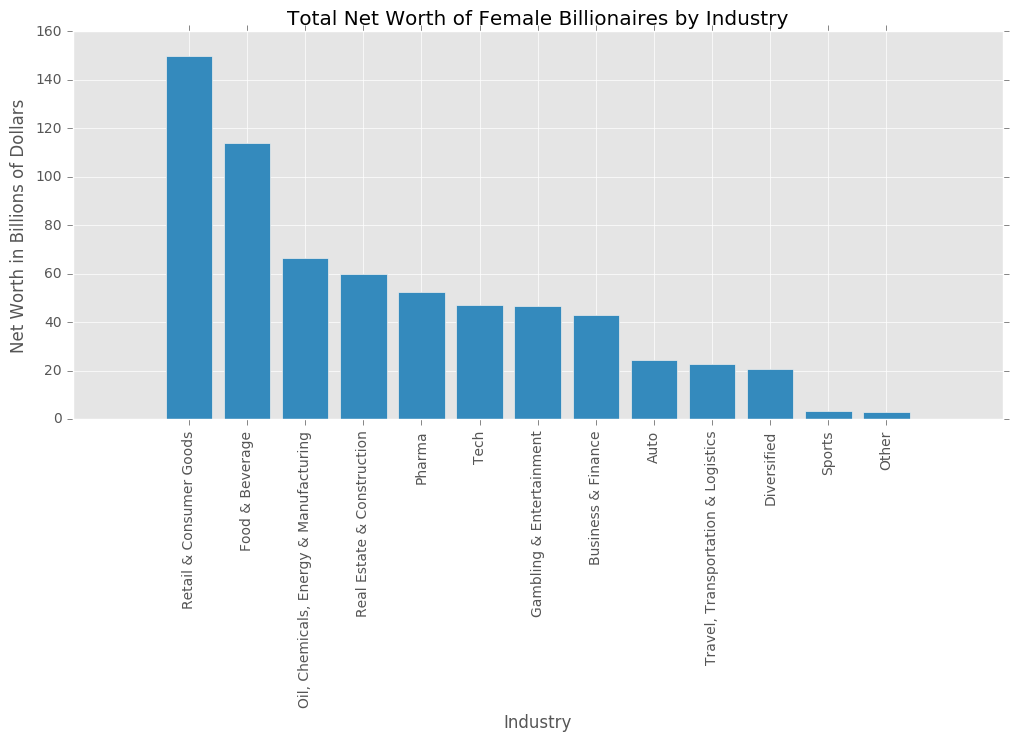

In [58]:
values = womenByIndustry["Total"]
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(len(sorted_values)), sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(sorted_values)), sorted_values[:,0], rotation=90)

plt.title("Total Net Worth of Female Billionaires by Industry")
plt.xlabel("Industry")
plt.ylabel("Net Worth in Billions of Dollars")

plt.show()

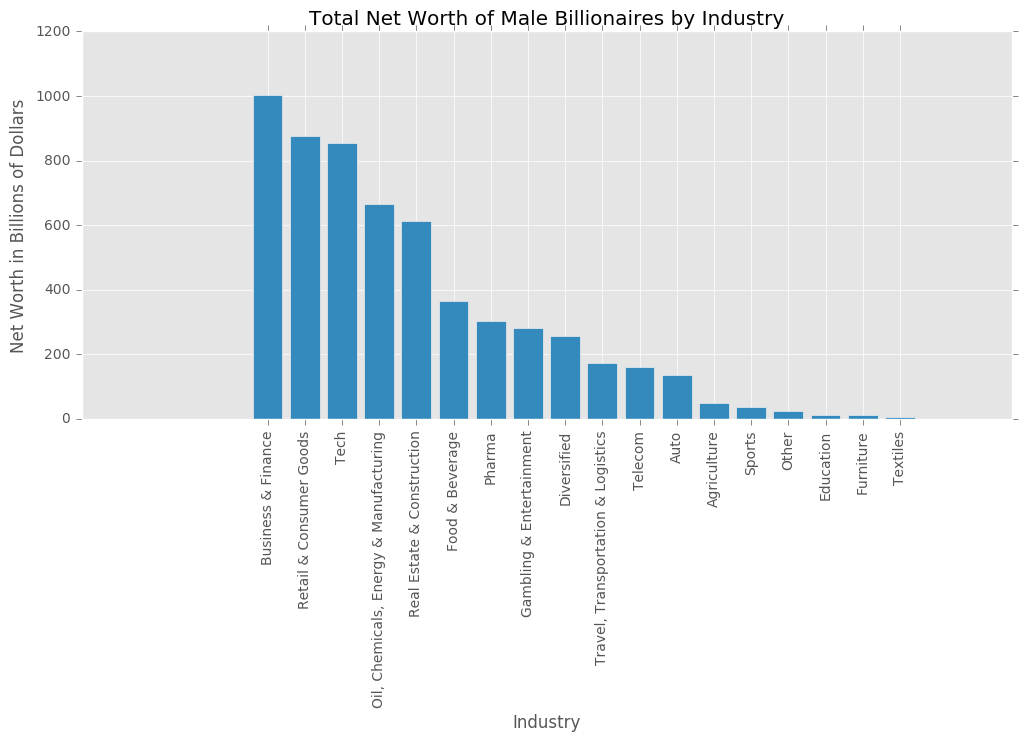

In [59]:
values = menByIndustry["Total"]
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(len(sorted_values)), sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(sorted_values)), sorted_values[:,0], rotation=90)

plt.title("Total Net Worth of Male Billionaires by Industry")
plt.xlabel("Industry")
plt.ylabel("Net Worth in Billions of Dollars")

plt.show()

## Export Updated Data

In [62]:
billionaires.to_csv("billionaires.csv")

The End